# FSA and fungal trait analysis

This notebook is part of the broader FSA and fungal trait project that aims to understand if we can find a correlation between the presence/absence of specific fungal secondary actins (FSA) and fungal traits. One main objective of this project is to use statistical model to test for such associations. 

**Notebook obejctive**:

This specific notebook focuses on the modeling/prediction of FSA status from discrete data / statistical modeling. focuses on the testing of continuous trait as predictors of FSA status using Logistic Regression (LR) and Phylogenetic Logistic Regression (PLR)

**Traits**:

The discrete traits that are tested to be predictors of FSA status are:
- presence/absence of genes (31 different genes => same gene than for gene count statistical model with continuous data)
- Ascomycota fruiting body information: ascoma development, ascoma type and ascus dehiscence
- Sterol type
- Growth form
- Trophic mode
- Guild 

**Strategy**:

For this first analysis, we are not taking into account the nonindependency of the data and will be using either a chisquare or an fisher exact test to test for the FSA status and trait independency.
Briefly, for each individual trait we will:

    1- Visualize data distribution
    2- Decide on whethet running a Chisquare or a Fisher excat test based on the contingency table of the expected frequencies: if at least one frequency is below 5, then we will perform a Fisher exact test, otherwise we will do a Chisquare.
    3.i - if we run a Chisquare: run the model and visualize residuals contribution when FSA and trait are not independent
    3.ii - if we run a Fisher exact test, run the test and a post-hoc test to identify what factor(s) contributes the most if FSA and trait are not independent

## Environment setup

In [1]:
library(ggplot2)
library(tidyverse)
library(corrplot)
library(rstatix)

── Attaching packages ──────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
── Conflicts ─────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘corrplot’ was built under R version 4.2.3”
corrplot 0.92 loaded

Warning message:
“package ‘rstatix’ was built under R version 4.2.3”

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




## Functions

In [2]:
# Function 1: generates a gg_barplot displaying the discrete trait levels distribution

trait_desc_p=function(data_trait){
    colnames(data_trait)=c('FSA','trait')
    data_viz_trait=data.frame(t(table(data_trait$trait)))[,-1]

    colnames(data_viz_trait)=c('trait_cat','count')

    plot_dist_trait=ggplot(data_viz_trait, aes(x=trait_cat,y=count))+
      geom_bar(stat='identity')+theme_light()+xlab('trait levels')
    
    plot_dist_trait
}

# Function 2: generates the contingency table for the discrete trait and the FSA status

cont_table_prep=function(data_cont){
  cont_table=data.frame(table(data_cont))%>%
    spread(FSA,Freq)
  
  colnames(cont_table)=c('trait','FSA_no','FSA_yes')
  rownames(cont_table)=cont_table$trait
  cont_table=cont_table[,-1]
  
  cont_table
  
}

# Function 3: calculates expected frequency values from a contingency table and indicates if Fisher exact test or Chisquare should be preformed based on frequency values

exp_freq_dec=function(cont_table){
    chi_test=chisq.test(cont_table)
    chi_exp=chi_test$expected
    
    if (any(chi_exp<=5)==TRUE){
        decision=print('At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence')
    } else {
        decision=print('All expected frequencies are greater than 5, pursue with a Chisquare test')
    }
    
    decision
}


## Trait data import

In [3]:
data_disc_traits=read.csv('data_tree_trait_210species_discrete.csv')

## <font color=#5088C5> Ascomycota fruiting body analysis </font>

3 different traits are parts of the Ascomycota fruiting body analysis:
    - ascoma_development
    - ascoma_type
    - ascus_dehiscence
    
Each trait will be investigated independently

For each trait we have the information for 35 species.

**Hypothesis**:

Here we are testing whether the presence/absence of FSA in a fungal species depends on any of these Ascus/Ascoma related traits. Ascoma and ascus are part of the sexual reproduction appartus that is specific to fungi of the Ascomycota phylum, thus this specifc test will be restricted to Ascomycota fungi.
For a single trait, using Chisquare or Fisher exact test, we are testing the null hypothesis that the trait and the FSA status are independent. If the null hyopthesis is rejected, this means the FSA and the trait are not independent, and post hoc analysis can be used to identify what'sub-traits' are actually significant. 

**Biological interpretation of rejected null hypothesis**:

If a model identifies that FSA status and one of these trait are not independent, this could suggest that FSA have a potential role in fruiting body morphology, production or fungal sexual reproduction. 


In [45]:
# First we extract the information for the Ascomycota traits from the general trait table

traits=c('ascoma_development','ascoma_type','ascus_dehiscence')

data_asco=data_disc_traits[,c('tip.label','FSA',traits)]%>%na.omit()
rownames(data_asco)=data_asco$tip.label
data_asco=data_asco[,-1]

### Ascomycota fruiting body trait #1: Ascoma development

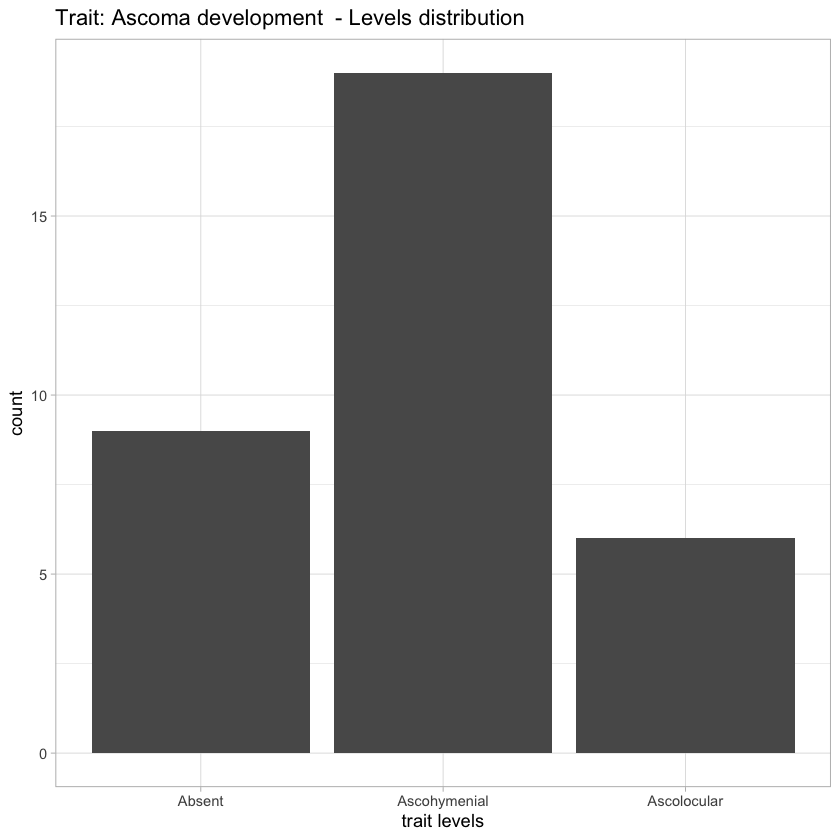

In [46]:
## 1- Data visualization

data_ascdev=data_asco[,c('FSA',traits[1])] # extract only the information for the ascoma development trait and FSA

plot_ascdev=trait_desc_p(data_ascdev)

plot_ascdev + ggtitle ('Trait: Ascoma development  - Levels distribution')

In [47]:
## 2 - Preparation of the contingency table

cont_table_ascdev=cont_table_prep(data_ascdev)
cont_table_ascdev

,FSA_no,FSA_yes
,<int>,<int>
Absent,9,0
Ascohymenial,8,11
Ascolocular,5,1


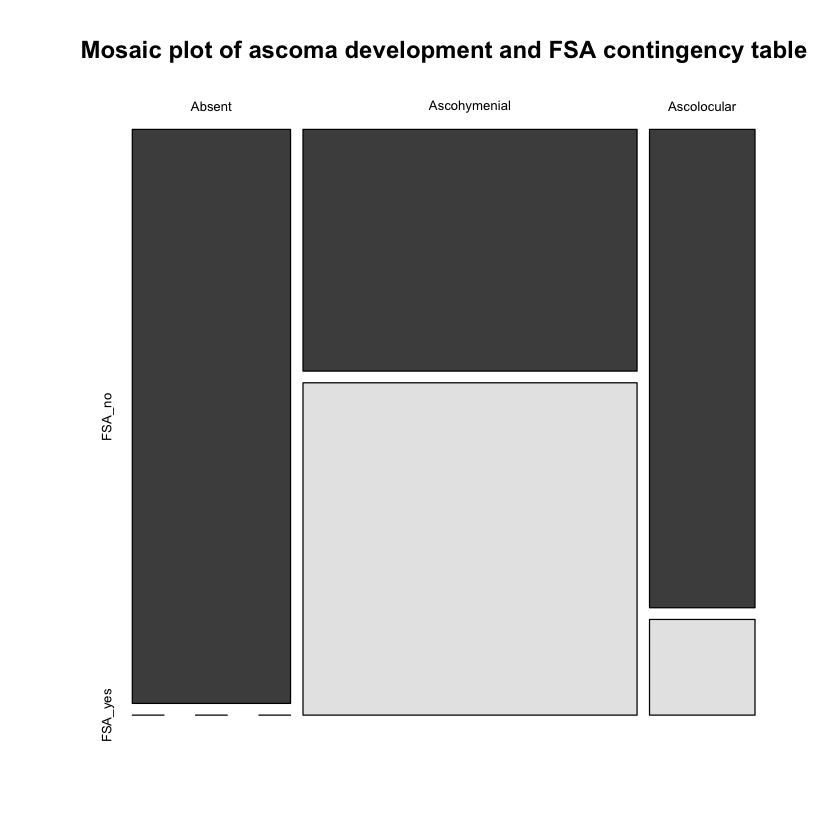

In [48]:
## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_ascdev, main='Mosaic plot of ascoma development and FSA contingency table',
                    color = TRUE)

In [49]:
## 4 - Expected frequency values calculation and test decision

asc_dev_test=exp_freq_dec(cont_table_ascdev)

Warning message in chisq.test(cont_table):
“Chi-squared approximation may be incorrect”


[1] "At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence"


In [50]:
## 5 - Test

# Fisher exact test
fish_t_ascdev=fisher.test(cont_table_ascdev)
fish_t_ascdev$p.value

[1] 0.004022244

In [51]:
## 6 - Post hoc pairwise test
pw_test=pairwise_fisher_test(as.matrix(cont_table_ascdev), p.adjust.method = "fdr")
pw_test

,group1,group2,n,p,p.adj,p.adj.signif
,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Absent,Ascohymenial,28,0.00393,0.0118,*
2,Absent,Ascolocular,15,0.40000,0.4000,ns
3,Ascohymenial,Ascolocular,25,0.16000,0.2400,ns


#### Test interpretation:

The Fisher exact test indicates that Ascoma development and FSA are not independent.
Pairwise comparison indicates that :
   - the FSA status of species with a ascoma development 'Absent' and ascoma development 'Ascohymenial' have significant different FSA status

**In combination with the mosaic plot, these tests indicates there is a significant association between absence of FSA (FSA_no) and absence of ascoma development. In other words, species that don't have any form of ascoma (Ascoma development Absent) are significantly more likely not to have a FSA.**

### Ascomycota fruiting body trait #2: Ascoma type

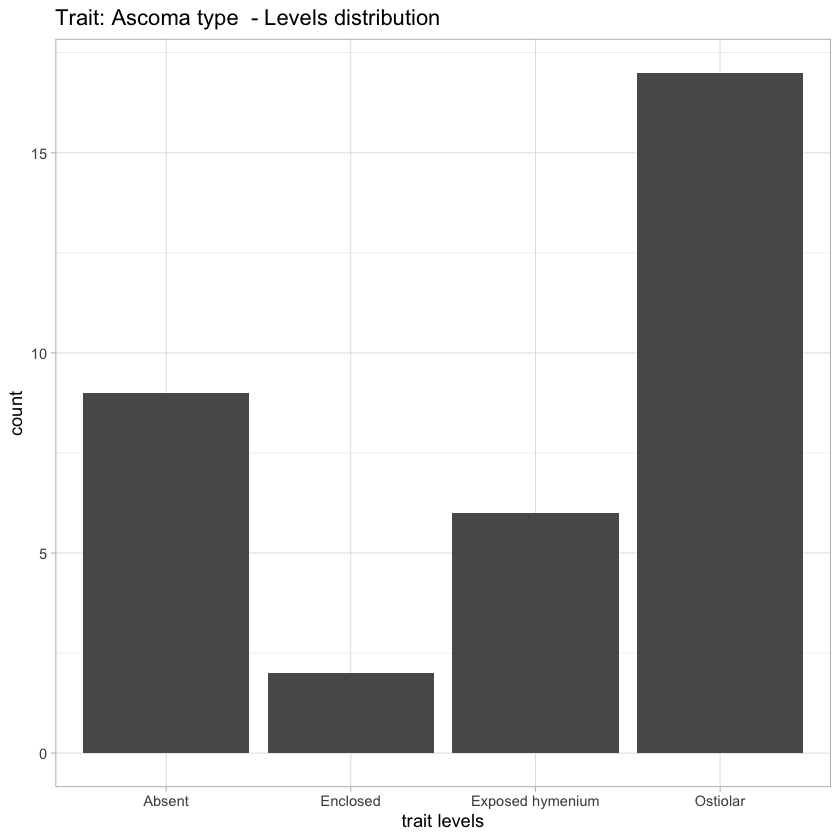

In [52]:
## 1- Data visualization

data_asctyp=data_asco[,c('FSA',traits[2])] # extract only the information for the ascoma type trait and FSA

plot_asctyp=trait_desc_p(data_asctyp)

plot_asctyp + ggtitle ('Trait: Ascoma type  - Levels distribution')

In [53]:
## 2 - Preparation of the contingency table

cont_table_asctyp=cont_table_prep(data_asctyp)
cont_table_asctyp

,FSA_no,FSA_yes
,<int>,<int>
Absent,9,0
Enclosed,1,1
Exposed hymenium,2,4
Ostiolar,10,7


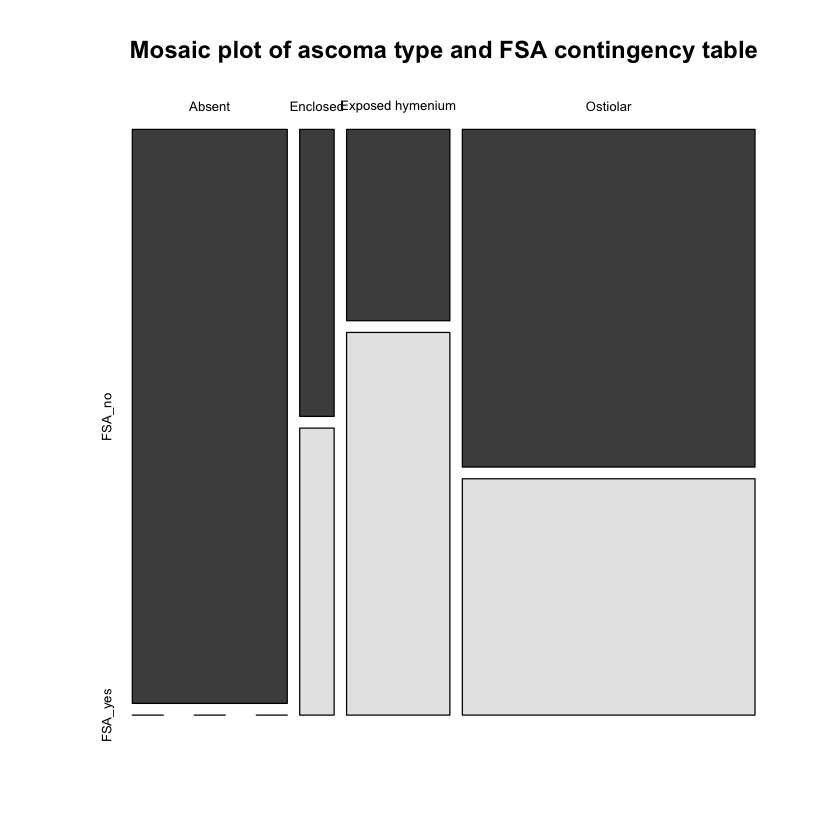

In [54]:
## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_asctyp, main='Mosaic plot of ascoma type and FSA contingency table',
                    color = TRUE)

In [55]:
## 4 - Expected frequency values calculation and test decision

asc_typ_test=exp_freq_dec(cont_table_asctyp)

Warning message in chisq.test(cont_table):
“Chi-squared approximation may be incorrect”


[1] "At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence"


In [56]:
## 5 - Test

# Fisher exact test
fish_t_asctyp=fisher.test(cont_table_asctyp)
fish_t_asctyp$p.value

[1] 0.01884473

In [57]:
## 6 - Post hoc pairwise test
pw_test=pairwise_fisher_test(as.matrix(cont_table_asctyp), p.adjust.method = "fdr")
pw_test

,group1,group2,n,p,p.adj,p.adj.signif
,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Absent,Enclosed,11,0.1820,0.364,ns
2,Absent,Exposed hymenium,15,0.0110,0.066,ns
3,Absent,Ostiolar,26,0.0578,0.173,ns
4,Enclosed,Exposed hymenium,8,1.0000,1.000,ns
5,Enclosed,Ostiolar,19,1.0000,1.000,ns
6,Exposed hymenium,Ostiolar,23,0.3710,0.556,ns


#### Test interpretation:

The Fisher exact test indicates that Ascoma type and FSA are not independent- which is consistent with the previous test.
Pairwise comparison actually doesn't identify specific pairwise differences.

**While we cannot distinguish specific groups from each others, considering the mosaic plot and the global fisher test  we can say that there is a significant association between absence of FSA (FSA_no) and absence of ascoma, consistent with what we have previsouly concluded.**

### Ascomycota fruiting body trait #3: Ascus dehiscence

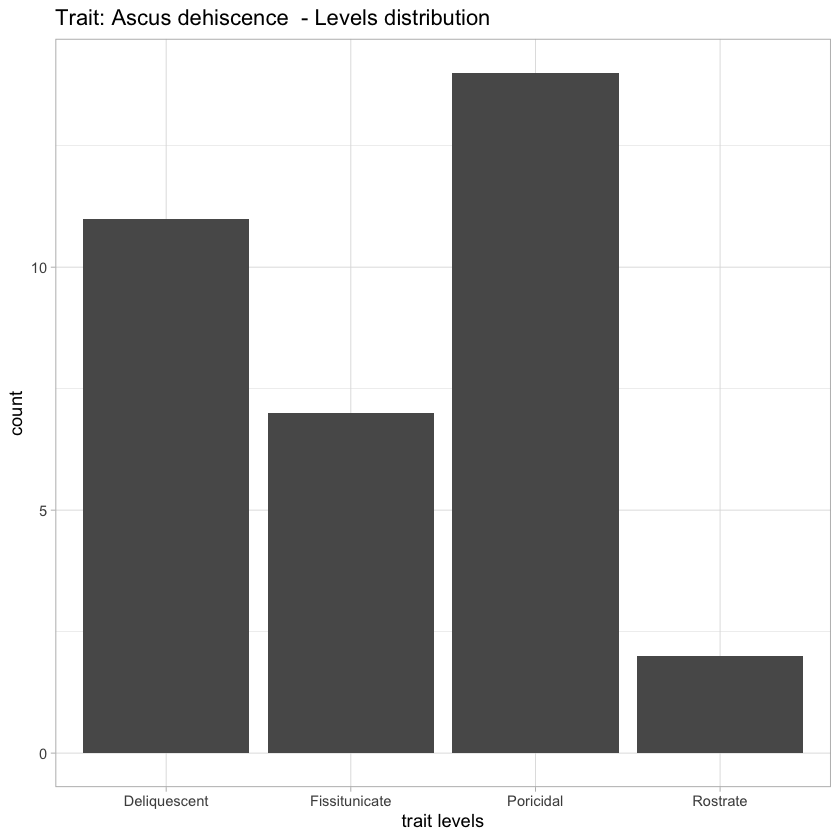

In [58]:
## 1- Data visualization

data_ascdeh=data_asco[,c('FSA',traits[3])] # extract only the information for the ascoma type trait and FSA

plot_ascdeh=trait_desc_p(data_ascdeh)

plot_ascdeh + ggtitle ('Trait: Ascus dehiscence  - Levels distribution')

In [59]:
## 2 - Preparation of the contingency table

cont_table_ascdeh=cont_table_prep(data_ascdeh)
cont_table_ascdeh

,FSA_no,FSA_yes
,<int>,<int>
Deliquescent,10,1
Fissitunicate,6,1
Poricidal,6,8
Rostrate,0,2


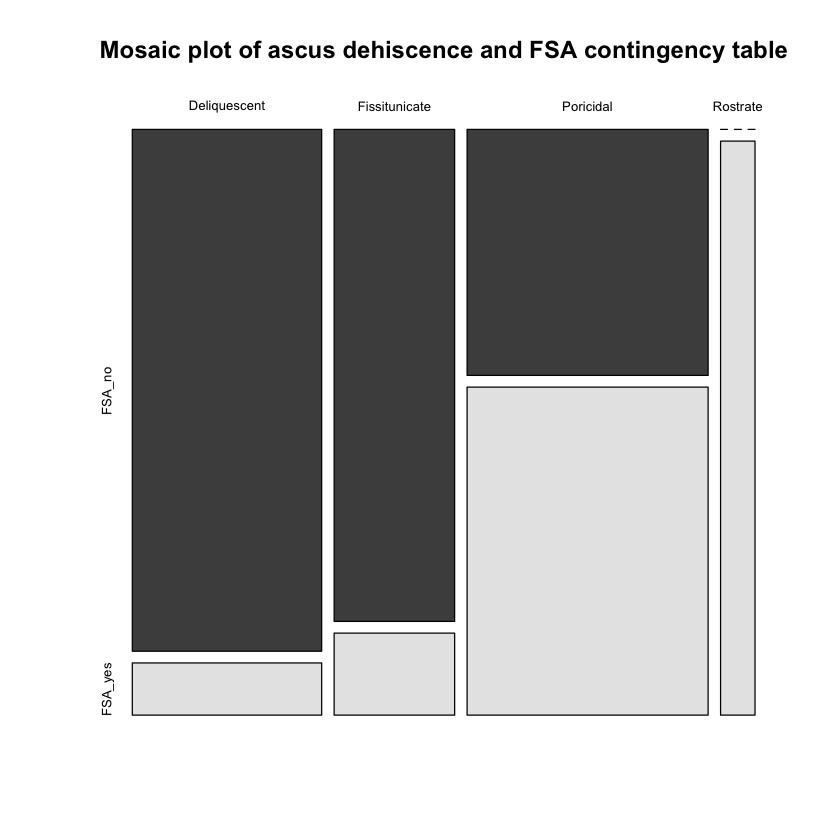

In [60]:
## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_ascdeh, main='Mosaic plot of ascus dehiscence and FSA contingency table',
                    color = TRUE)

In [61]:
## 4 - Expected frequency values calculation and test decision

asc_deh_test=exp_freq_dec(cont_table_ascdeh)

Warning message in chisq.test(cont_table):
“Chi-squared approximation may be incorrect”


[1] "At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence"


In [62]:
## 5 - Test

# Fisher exact test
fish_t_ascdeh=fisher.test(cont_table_ascdeh)
fish_t_ascdeh$p.value

[1] 0.009725872

In [63]:
## 6 - Post hoc pairwise test
pw_test=pairwise_fisher_test(as.matrix(cont_table_ascdeh), p.adjust.method = "fdr")
pw_test

,group1,group2,n,p,p.adj,p.adj.signif
,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Deliquescent,Fissitunicate,18,1.0000,1.000,ns
2,Deliquescent,Poricidal,25,0.0330,0.115,ns
3,Deliquescent,Rostrate,13,0.0385,0.115,ns
4,Fissitunicate,Poricidal,21,0.1590,0.238,ns
5,Fissitunicate,Rostrate,9,0.0833,0.167,ns
6,Poricidal,Rostrate,16,0.5000,0.600,ns


#### Test interpretation:

The Fisher exact test indicates that Ascus dehiscence and FSA are not independent however, post hoc analysis did not identify anyb specific pair of groups for which we can say that tehy have significantly different FSA status.

**Ascus dehiscence and FSA status are non independent. While it seems that deliquescent ascii are more like to be assocaited with the absence of FSA, post-hoc were not significant.**

### <font color=grey> Conclusions on Ascomycota fruiting body traits and FSA status:</font>

Overall, we see here that FSA status and Ascomycota fruiting body traits are not independent. The models tend to highlight that species that don't form ascomycota (...) and have deliquescent ascii are likely not to have FSA. In this dataset, deliquescent ascii are associated with absence of ascoma and yeast species that are known not to produce Ascoma and to produce deliquescent ascii.
Altogether, this could highlight that FSA are important for ascoma morphology/physiology.Howevre, as it seems that yeast in genral don't have FSA, we can assume that with this type of test, FSA would come up as potentially assocaited with any specific non-yeast traits.

---

## <font color=#5088C5> Sterol type analysis </font>

Sterols are essential components of eukaryotic cell membranes. In fungi, ergosterol is the major found sterol in cell membranes and is ofetn used as a target for anti-fungal treatment. Yet diversity of sterols in fungi seem more complex that previously known. Sterols are required for fungal growth as they regulate membrane fluidity and structure as well as membrane permeability and regulating membrane-bound enzymes.

We have cell membrane sterol information as well as FSA status information for 18 species 

**Hypothesis**:

Here we are testing whether the presence/absence of FSA in a fungal species depends on the type of sterol found in the species cell membrane. 
Using Chisquare or Fisher exact test, we test the null hypothesis that streol type and the FSA status are independent. If the null hyopthesis is rejected, this means the FSA and sterol type are not independent, and post hoc analysis can be used to identify what sterol types are actually significant. 

**Biological interpretation of rejected null hypothesis**:

If a model identifies that FSA status and sterol are not independent, this could suggest that FSA could have a potentially specific role in membrane integrety and or cell growth associated with sterol specificity. 

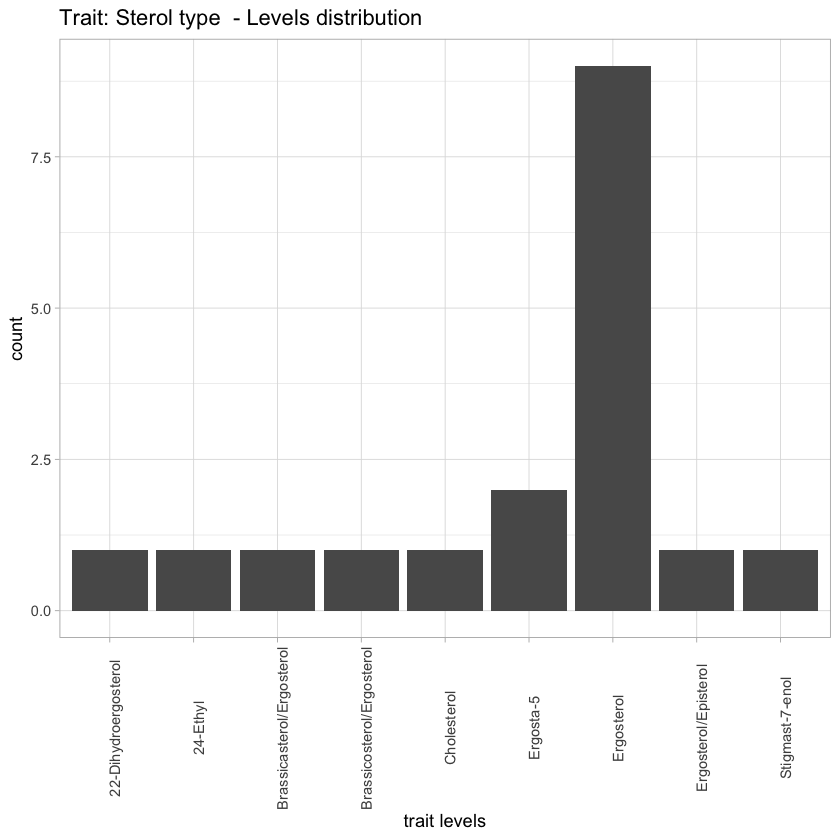

In [64]:
## 1- Data extraction and visualization

# First we extract the information for sterol type from the general trait table

data_sterol=data_disc_traits[,c('tip.label','FSA','sterol_type')]%>%na.omit()
rownames(data_sterol)=data_sterol$tip.label
data_sterol=data_sterol[,-1]

plot_sterol=trait_desc_p(data_sterol)

plot_sterol + ggtitle ('Trait: Sterol type  - Levels distribution') +
    theme(axis.text.x = element_text(angle=90))

In [65]:
## 2 - Preparation of the contingency table

cont_table_sterol=cont_table_prep(data_sterol)
cont_table_sterol

,FSA_no,FSA_yes
,<int>,<int>
22-Dihydroergosterol,1,0
24-Ethyl,0,1
Brassicasterol/Ergosterol,0,1
Brassicosterol/Ergosterol,0,1
Cholesterol,0,1
Ergosta-5,1,1
Ergosterol,6,3
Ergosterol/Episterol,0,1
Stigmast-7-enol,0,1


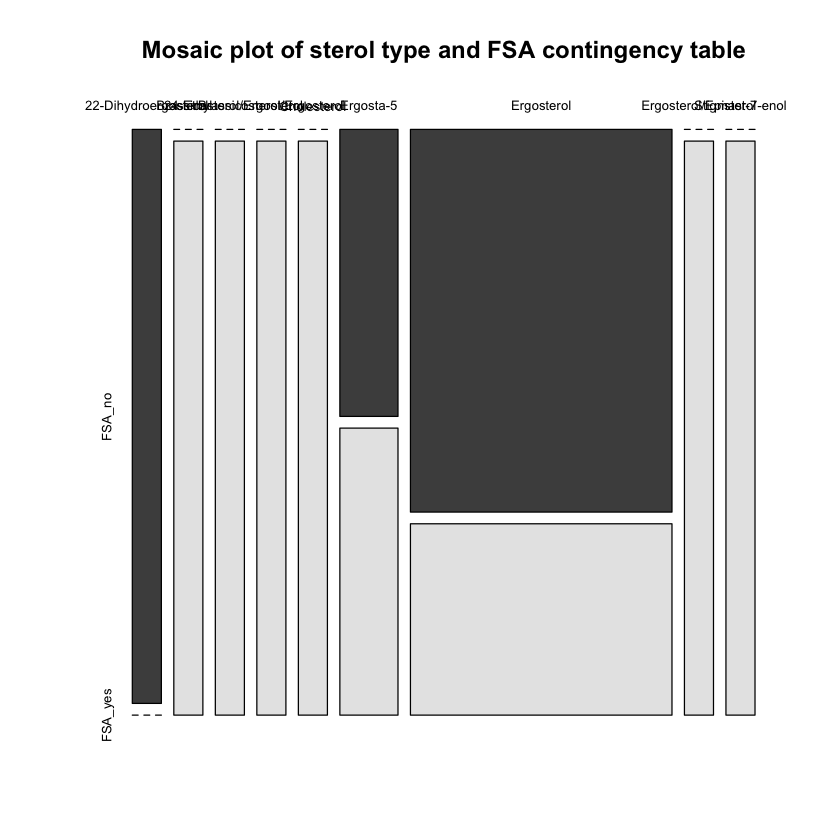

In [66]:
## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_sterol, main='Mosaic plot of sterol type and FSA contingency table',
                    color = TRUE)

In [67]:
## 4 - Expected frequency values calculation and test decision

sterol_test=exp_freq_dec(cont_table_sterol)

Warning message in chisq.test(cont_table):
“Chi-squared approximation may be incorrect”


[1] "At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence"


In [68]:
## 5 - Test

# Fisher exact test
fish_t_sterol=fisher.test(cont_table_sterol)
fish_t_sterol$p.value

[1] 0.677499

### <font color=gray> Conclusions on Sterol type and FSA status: </font>

**FSA status and Sterol composition are two independent variables**

---

## <font color=#5088C5> Growth form analysis </font>

Fungi have evolved a variety of growth forms, microspic and macroscopic.
Actin is known to be an essential protein in cell elongation and growth, therefore, association between FSA and specific growth form could be expected.

We have growth form information as well as FSA status information for 46 species 

**Hypothesis**:

We test whether the presence/absence of FSA in a fungal species depends on the growth form of fungal species.
Using Chisquare or Fisher exact test, we test the null hypothesis that growth form and FSA status are independent. If the null hyopthesis is rejected, this means the FSA and growth form are not independent, and post hoc analysis can be used to identify what growth types are actually significant. 

**Biological interpretation of rejected null hypothesis**:

If a model identifies that FSA status and growth form are not independent, this could suggest that FSA play a role in the growth mechanims or strutures associated with these specific growth forms. 

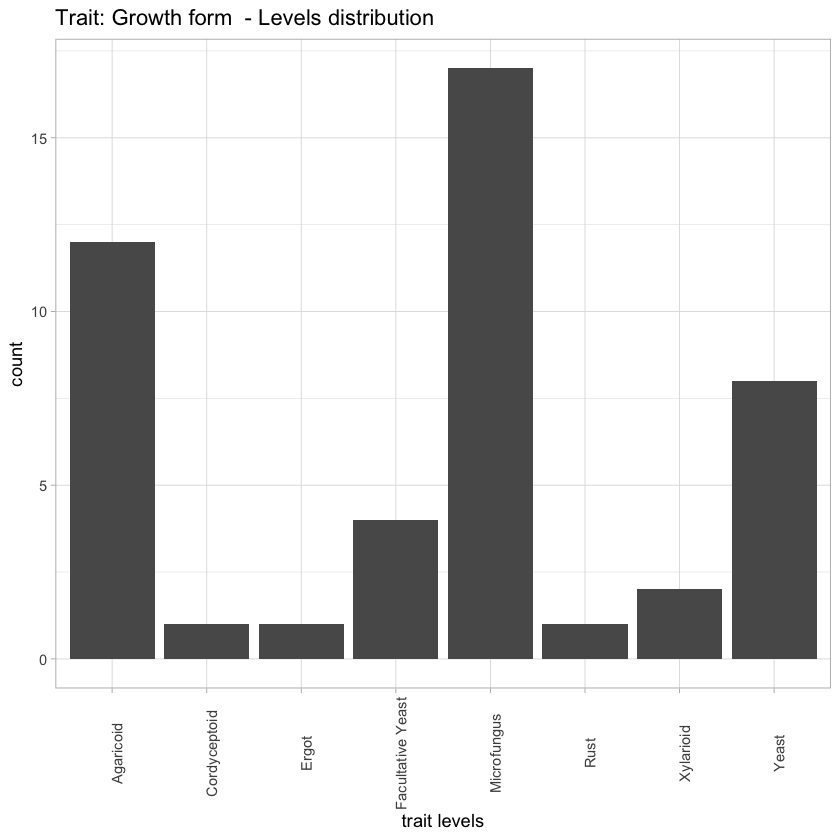

In [69]:
## 1- Data extraction and visualization

# First we extract the information for growth form from the general trait table

data_growth=data_disc_traits[,c('tip.label','FSA','growth_form_fg')]%>%na.omit()
rownames(data_growth)=data_growth$tip.label
data_growth=data_growth[,-1]

plot_growth=trait_desc_p(data_growth)

plot_growth + ggtitle ('Trait: Growth form  - Levels distribution') +
    theme(axis.text.x = element_text(angle=90))

<font color=#495057> *Note: while 8 growth forms are highlighted, 4 seems to be the most represented (5 or more species). Having a lot of trait level with only 1 species may introduce a lot of noise. I will then run 2 analysis: (i) one keeping all levels and, (ii) one where all the levels with 1 or 2 species pooled into a single level "other"* </font>

**Analysis with all levels**

,FSA_no,FSA_yes
,<int>,<int>
Agaricoid,2,10
Cordyceptoid,0,1
Ergot,1,0
Facultative Yeast,3,1
Microfungus,9,8
Rust,0,1
Xylarioid,0,2
Yeast,7,1


Warning message in chisq.test(cont_table):
“Chi-squared approximation may be incorrect”


[1] "At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence"


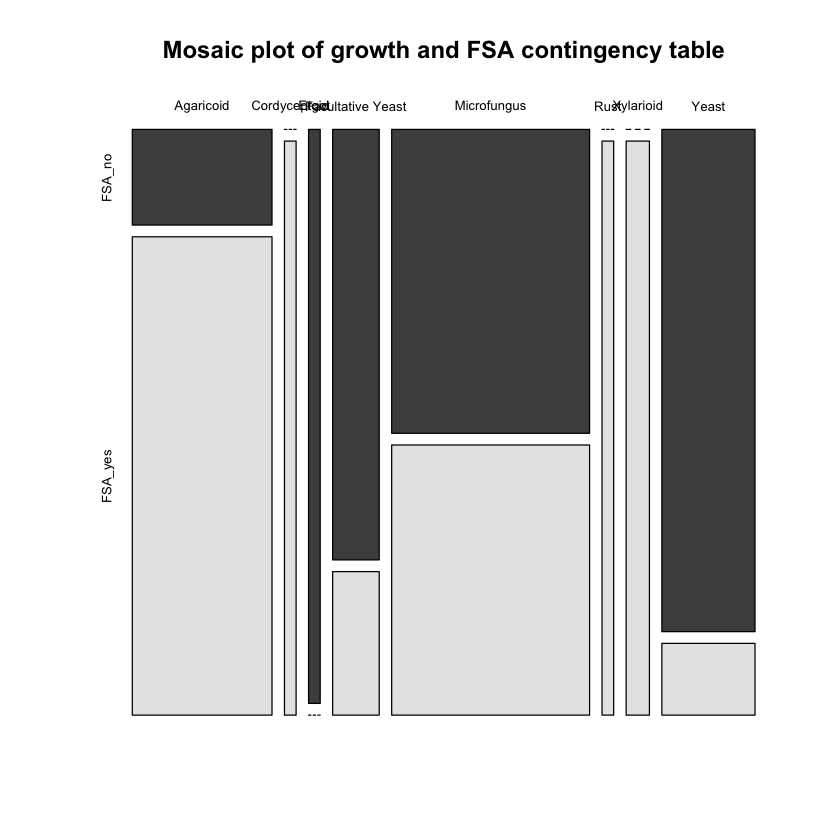

In [77]:
## 2 - Preparation of the contingency table

cont_table_growth=cont_table_prep(data_growth)
cont_table_growth

## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_growth, main='Mosaic plot of growth and FSA contingency table',
                    color = TRUE)

## 4 - Expected frequency values calculation and test decision
growth_test=exp_freq_dec(cont_table_growth)

In [78]:
## 5 - Test

# Fisher exact test
fish_t_growth=fisher.test(cont_table_growth)
fish_t_growth$p.value

[1] 0.007530574

In [79]:
## 6 - Post hoc pairwise test
pw_test=pairwise_fisher_test(as.matrix(cont_table_growth), p.adjust.method = "fdr")
pw_test

,group1,group2,n,p,p.adj,p.adj.signif
,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Agaricoid,Cordyceptoid,13,1.00000,1.000,ns
2,Agaricoid,Ergot,13,0.23100,0.808,ns
3,Agaricoid,Facultative Yeast,16,0.06320,0.467,ns
4,Agaricoid,Microfungus,29,0.06410,0.467,ns
5,Agaricoid,Rust,13,1.00000,1.000,ns
6,Agaricoid,Xylarioid,14,1.00000,1.000,ns
7,Agaricoid,Yeast,20,0.00452,0.127,ns
8,Cordyceptoid,Ergot,2,1.00000,1.000,ns
9,Cordyceptoid,Facultative Yeast,5,0.40000,0.933,ns


**Analysis collapsing small size levels**

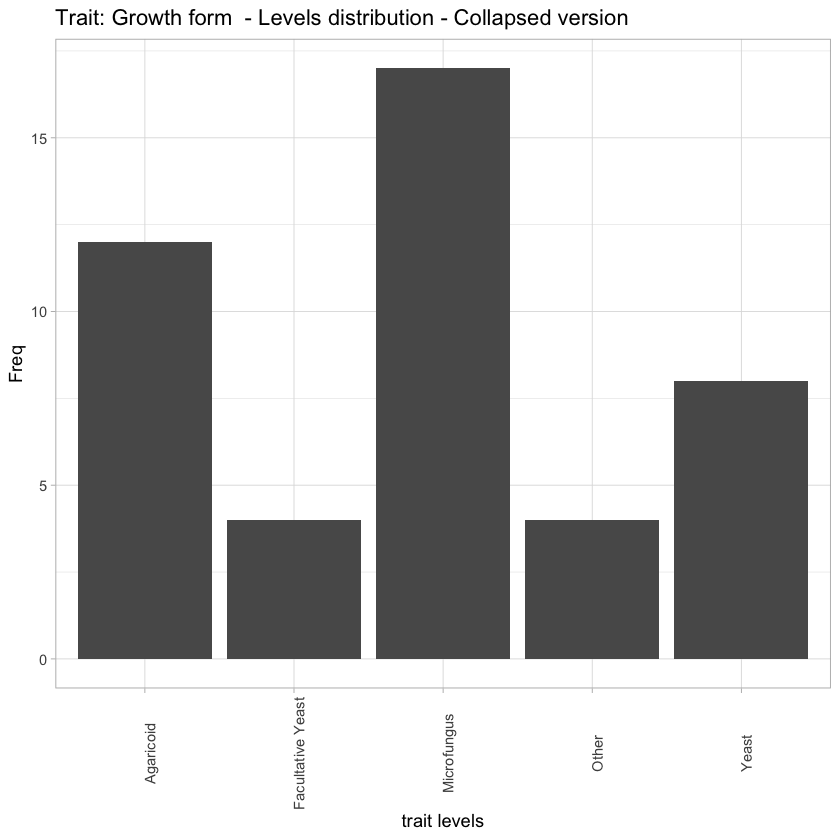

In [81]:
## Reformating data to reduce number of levels
# Pooling all levels with only 1 or 2 into a single level named 'other'

data_table=data.frame(t(table(data_growth$growth_form_fg)))[,-1]

data_growth_collapsed=data.frame()

levels=as.character(data_table$Var2)
other_c=0
level_small=c()
for (i in 1:length(levels)){
  count_lev=data_table[i,2]
  if(count_lev<=2){
    other_c=other_c+1
    level_small=c(level_small,levels[i])
  }else{
    df_temp=data_table[i,]
    data_growth_collapsed=rbind(data_growth_collapsed,df_temp)
  }
}

data_growth_collapsed=data_growth_collapsed%>%add_row('Var2'='Other','Freq'=other_c)

plot_dist_growth_coll=ggplot(data_growth_collapsed, aes(x=Var2,y=Freq))+
      geom_bar(stat='identity')+theme_light()+xlab('trait levels') + 
    ggtitle ('Trait: Growth form  - Levels distribution - Collapsed version') +
    theme(axis.text.x = element_text(angle=90))
    
plot_dist_growth_coll

,FSA_no,FSA_yes
,<int>,<int>
Agaricoid,2,10
Facultative Yeast,3,1
Microfungus,9,8
Other,1,4
Yeast,7,1


Warning message in chisq.test(cont_table):
“Chi-squared approximation may be incorrect”


[1] "At least one expected frequency is lower than 5, pursue with a Fisher exact test of independence"


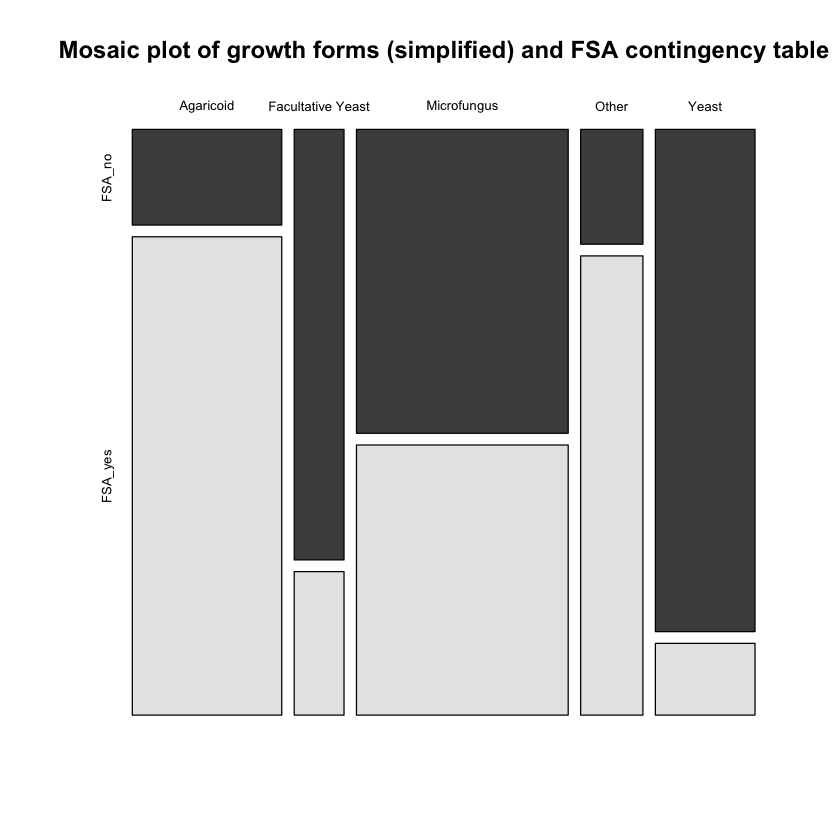

In [82]:

## reformating trait data, replacing 'small size' levels name by 'Other' to be able to generate the contingency table
data_growth_replaced=data_growth
data_growth_replaced$growth_form_fg[data_growth_replaced$growth_form_fg%in%level_small]='Other'

## 2 - Preparation of the contingency table

cont_table_growth_collapsed=cont_table_prep(data_growth_replaced)
cont_table_growth_collapsed

## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_growth_collapsed, main='Mosaic plot of growth forms (simplified) and FSA contingency table',
                    color = TRUE)

## 4 - Expected frequency values calculation and test decision
growth_test=exp_freq_dec(cont_table_growth_collapsed)


In [83]:
## 5 - Test

# Fisher exact test
fish_t_growth_collapsed=fisher.test(cont_table_growth_collapsed)
fish_t_growth_collapsed$p.value

[1] 0.009115179

In [84]:
## 6 - Post hoc pairwise test
pw_test=pairwise_fisher_test(as.matrix(cont_table_growth_collapsed), p.adjust.method = "fdr")
pw_test

,group1,group2,n,p,p.adj,p.adj.signif
,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,Agaricoid,Facultative Yeast,16,0.06320,0.1600,ns
2,Agaricoid,Microfungus,29,0.06410,0.1600,ns
3,Agaricoid,Other,17,1.00000,1.0000,ns
4,Agaricoid,Yeast,20,0.00452,0.0452,*
5,Facultative Yeast,Microfungus,21,0.60300,0.7540,ns
6,Facultative Yeast,Other,9,0.20600,0.3430,ns
7,Facultative Yeast,Yeast,12,1.00000,1.0000,ns
8,Microfungus,Other,22,0.32300,0.4610,ns
9,Microfungus,Yeast,25,0.18200,0.3430,ns


### <font color=gray> Conclusions growth form and FSA status: </font>

Whether we collapse the tait levels associated with a small number of species into a single level, or not, the Fisher test of independence identifies that **Growth form and FSA status are nor independent**.

Post-hoc further identifies that FSA status of yeast form and agaricoid form are significantly different. In other words, species that have yeast form growth are more likely not to have FSA, while agaricoid growing species are more likely to have FSA. 
This observation is consistent with previous observation that yeast species don't have FSA. This could highlight that specific non-yeast growth mechanisms or structure require FSA.

---

## <font color=#5088C5> Gene presence/absence analysis </font>

We previsouly run statistical modeling of FSA status from gene copy number as a contninous variable. Another way to look at it could be to simplify the correlation analysis by testing if the simple presence/absence of these genes are predictive of the FSA status.
We perform the test for 31 genes on 112 species

**Hypothesis**: for each gene individually, we are testing if their presence or absence is independent of the FSA status of fungal species. 

**Biological interpretation of non independence**: for a given gene, if FSA and the gene presence/absence are non independent, this could inform us that the function sustain by this gene and the function of the FSA are connected

In [86]:
# Data extraction and transformation

#list of all the genes that are tested
trait_gene=c('acidPhosphatase_count', 'alphaGlucosidase15_count', 'alphaGlucosidase31_count', 'alphaManNAase76_count', 'aminoAcidPermease_count',
             'ammoniumTransporter_count', 'amylase88_count', 'auxinResponsivePromoter_count', 'betaGlucanSynthase_count', 'betaGlucosidase1_count',
             'betaXylosidase43_count', 'cellobiohydrolase6_count', 'cellobiohydrolase7_count', 'chitinase_count', 'chitosanase8_count', 
             'coldShockProtein_count', 'crystalineCellulaseAA9_count', 'endoglucanase12_count', 'endoglucanase9_count', 'fungalLigninPeroxidase_count',
             'glucosidase81_count', 'glycopeptidase85_count', 'glycoproteinSynthesis92_count', 'heatShockProtein_count', 'invertase32_count', 
             'melanin_count', 'nitrateTransporter_count', 'phosphateTransporter_count', 'RNAHelicase_count', 'RNApolymerase_count', 'trehalase_count')

data_genes=data_disc_traits[,c('tip.label','FSA',trait_gene)]%>%na.omit()

#replacing gene number by simple presence/absence information
data_genes_simple=data_genes[,3:33]
data_genes_simple[data_genes_simple>=1]='Present'
data_genes_simple[data_genes_simple==0]='Absent'
data_genes_simple=cbind(data_genes[,1:2],data_genes_simple) 


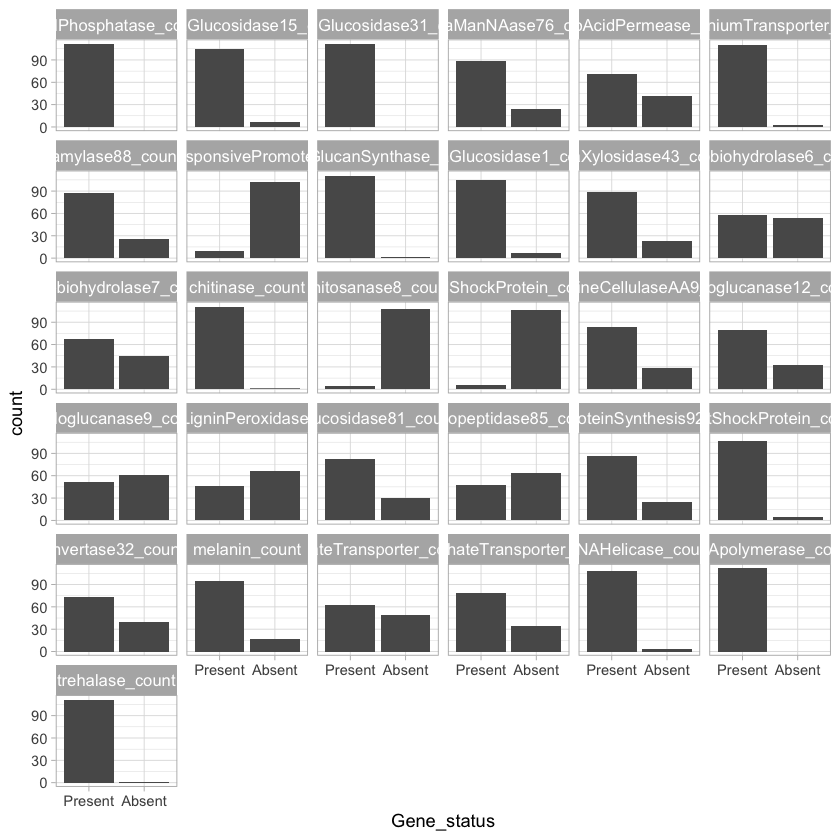

In [87]:
## 1- Data visualization
## For each gene, we visualize how many the number of counts of presence/absence to have an idea of the diversity of each gene status withinh our set of species

data_genes_simple_g=gather(data_genes_simple,'Gene','Gene_status',acidPhosphatase_count:trehalase_count)

data_for_plot=data.frame()
for (i in 1:length(trait_gene)){
  dat=subset(data_genes_simple_g, data_genes_simple_g$Gene==trait_gene[i])
  count_tp=data.frame(t(table(dat$Gene_status)))[,-1]
  colnames(count_tp)=c('Gene_status','count')
  dat_temp=data.frame('Gene'=trait_gene[i],count_tp)
  
  data_for_plot=rbind(data_for_plot,dat_temp)
 }

plot_facet=ggplot(data_for_plot, aes(x=Gene_status,y=count))+
  geom_bar(stat='identity') + facet_wrap(~Gene) +
  theme_light() + theme(strip.text = element_text(size=10))

plot_facet


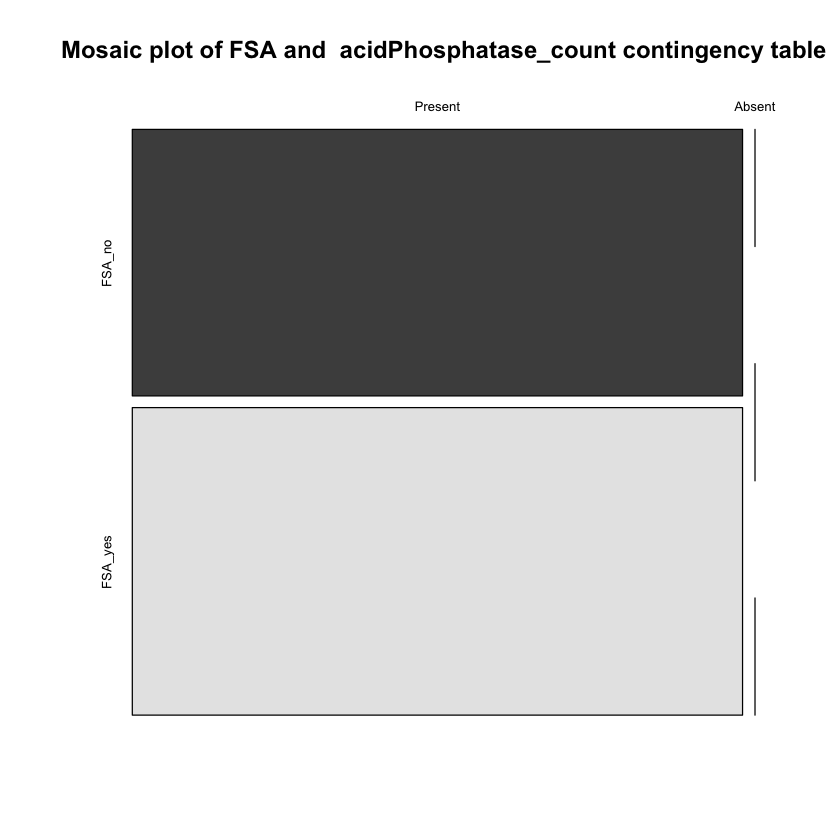

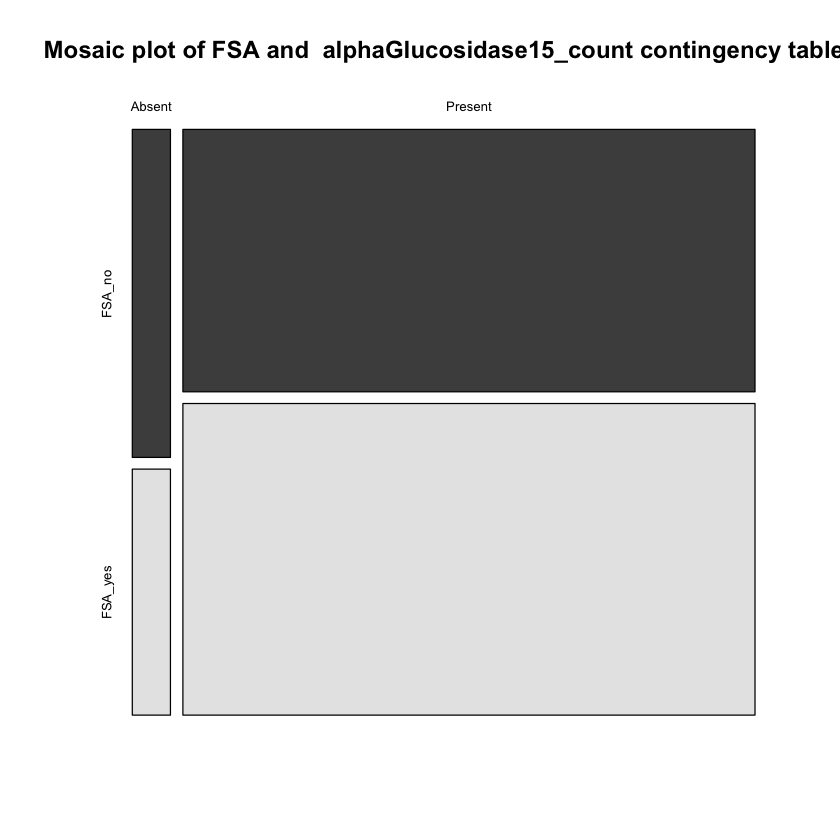

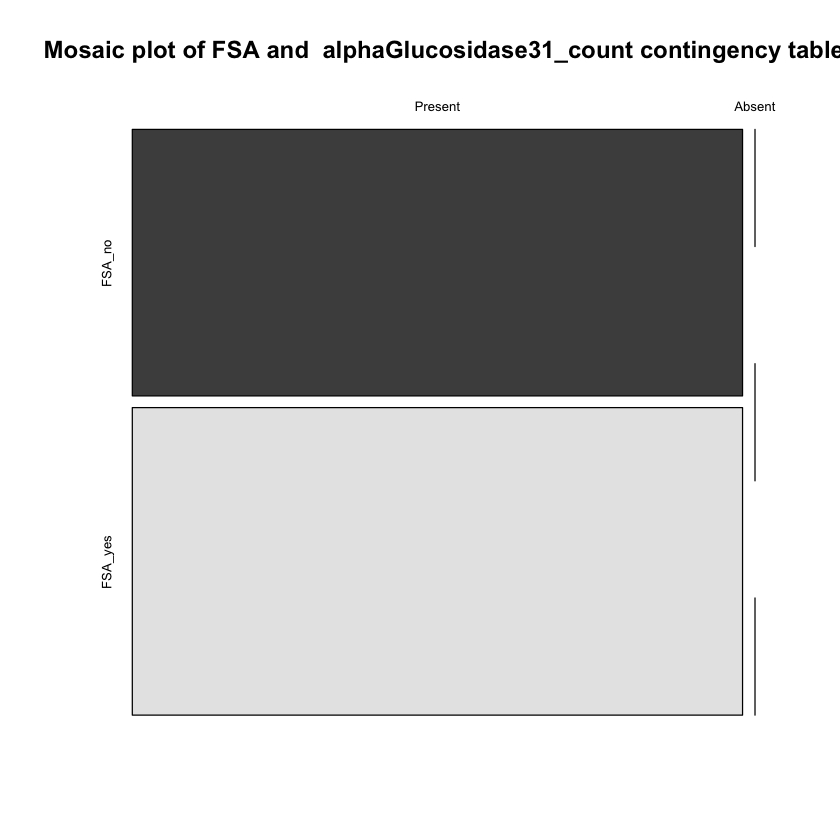

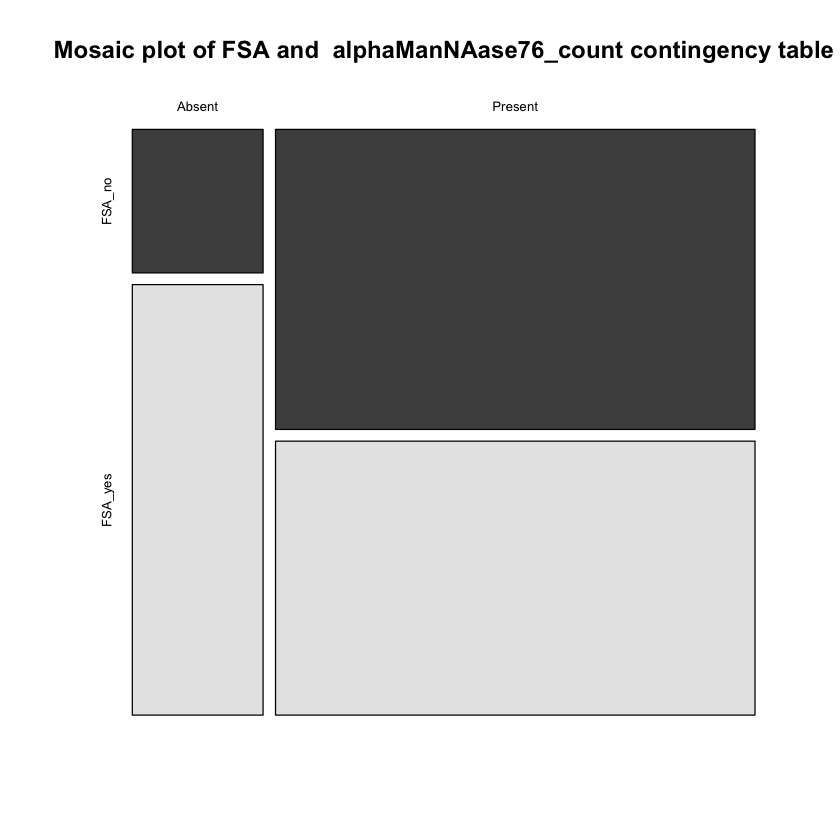

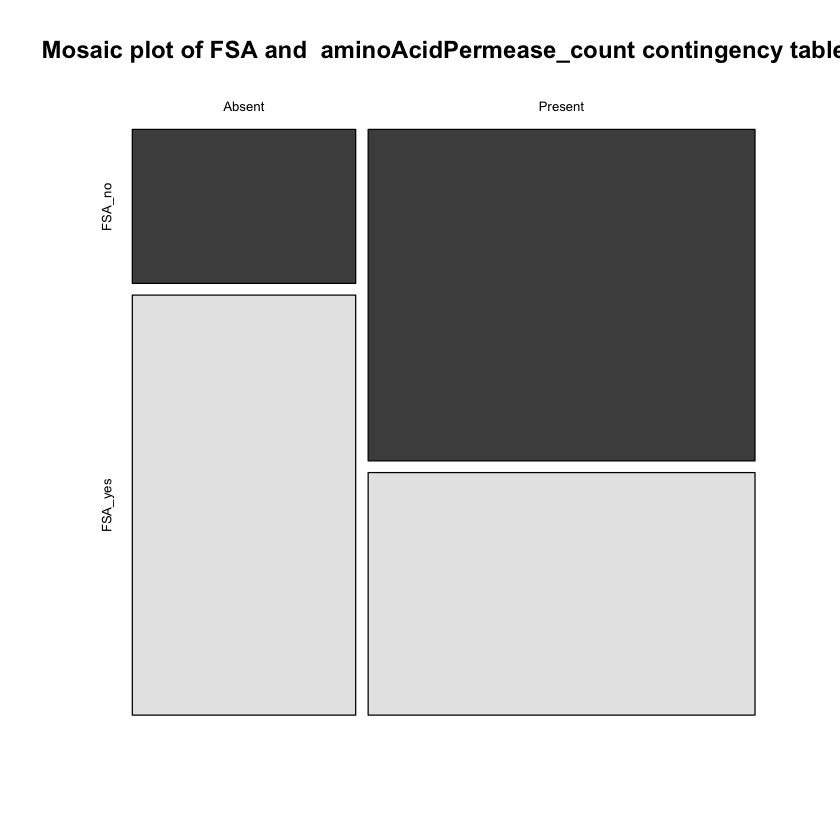

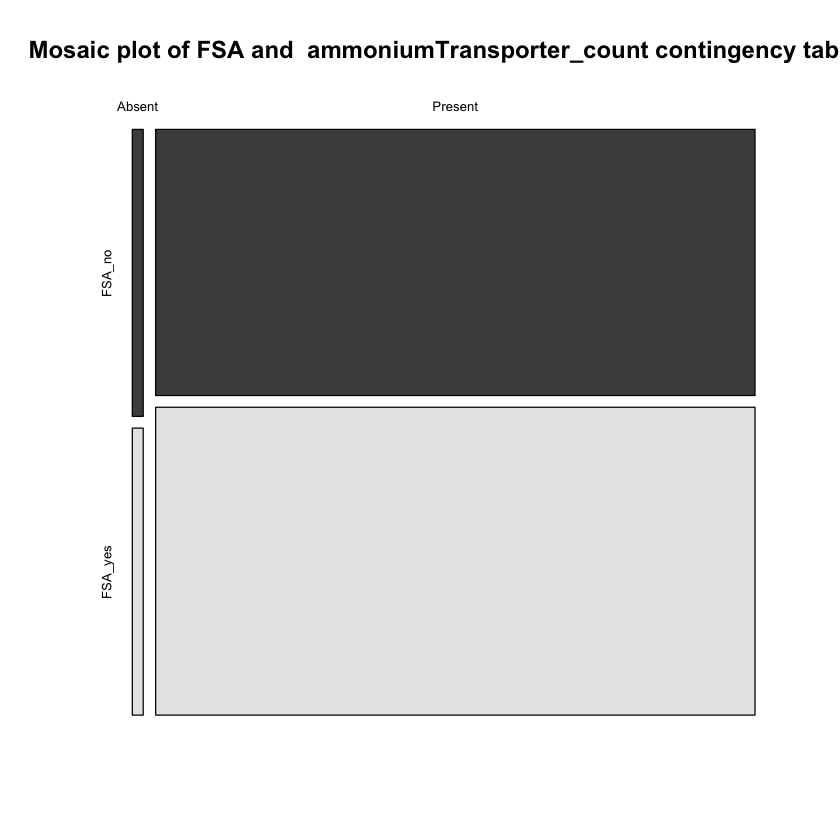

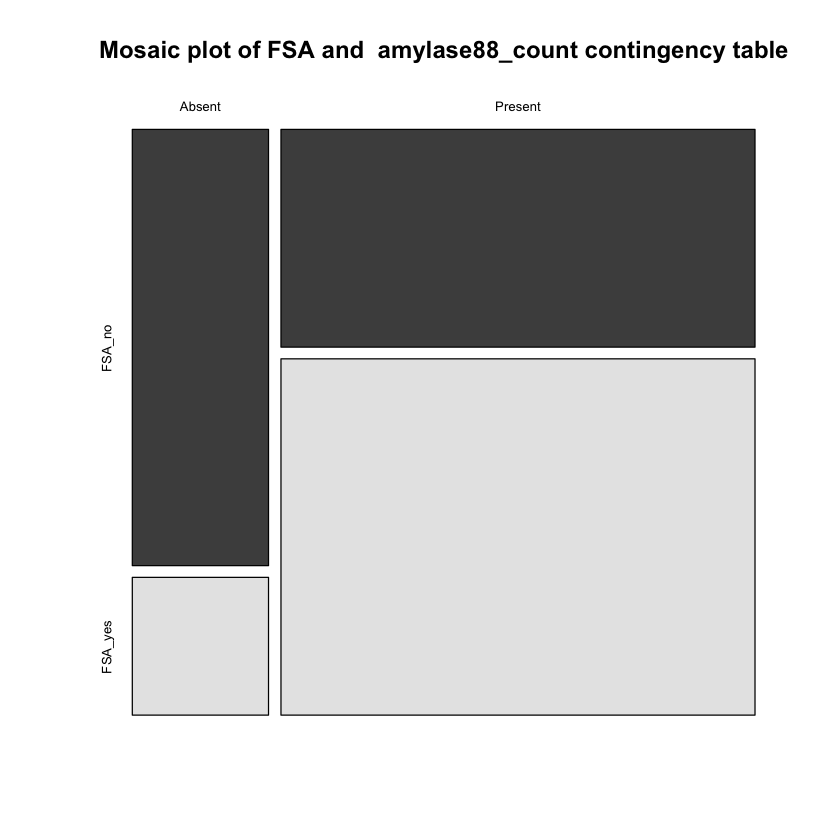

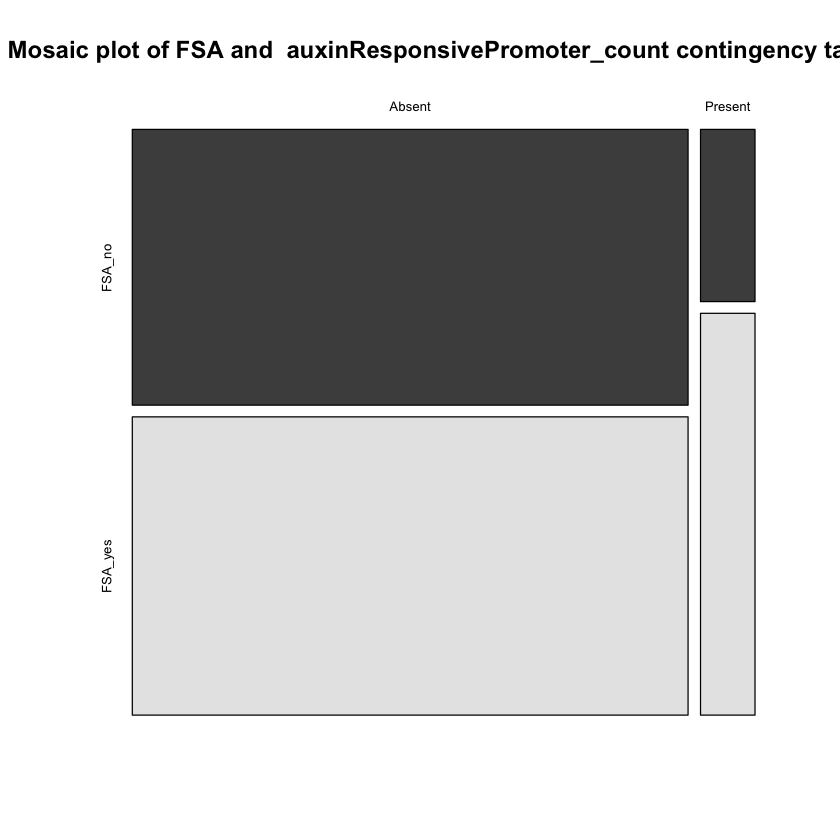

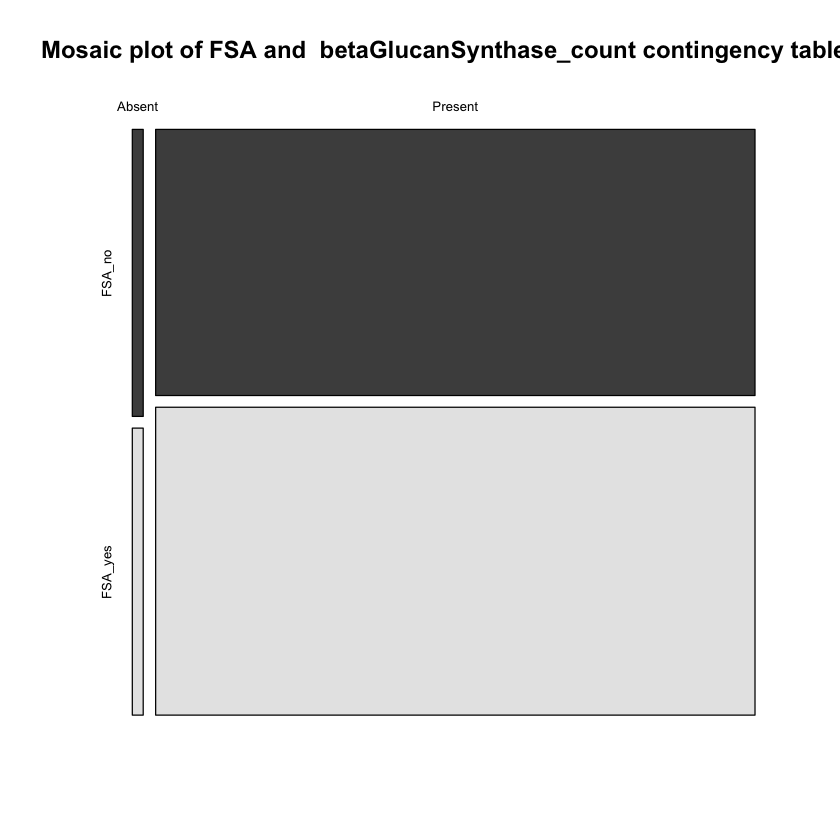

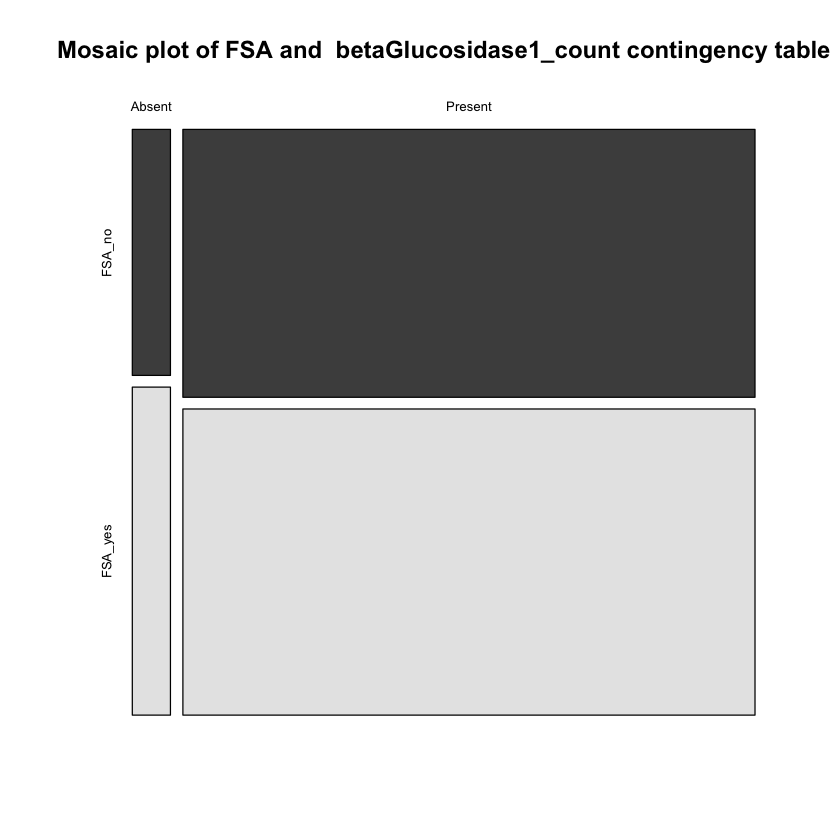

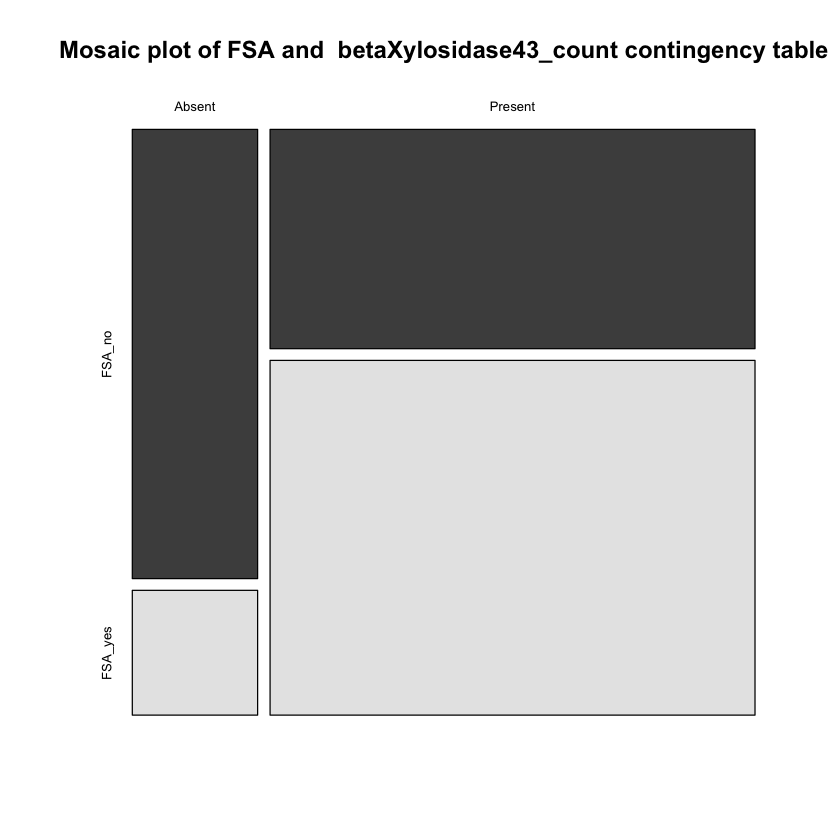

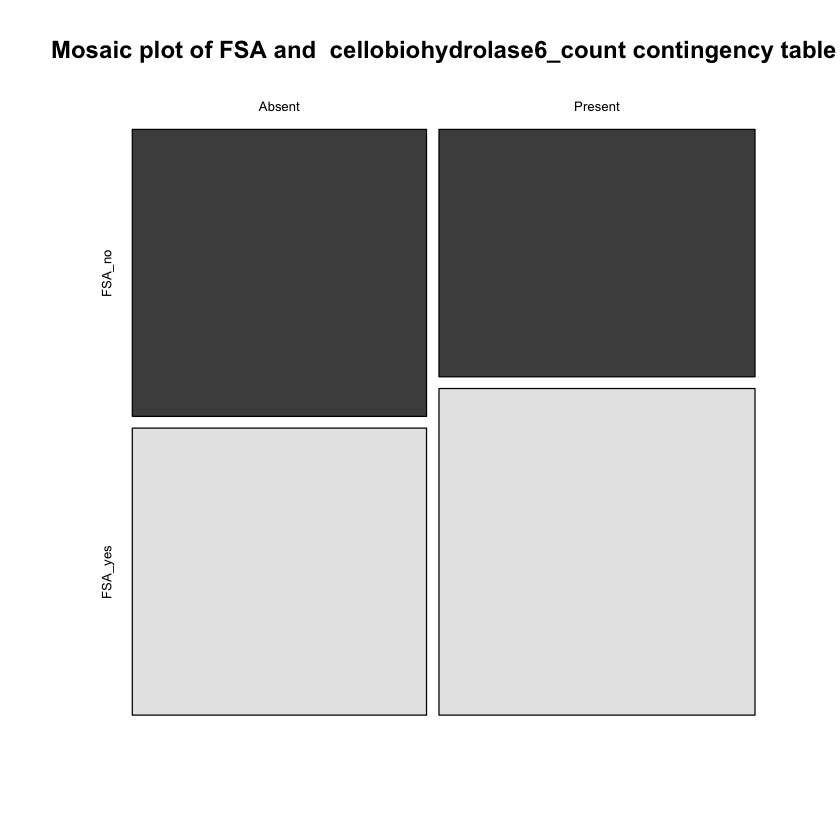

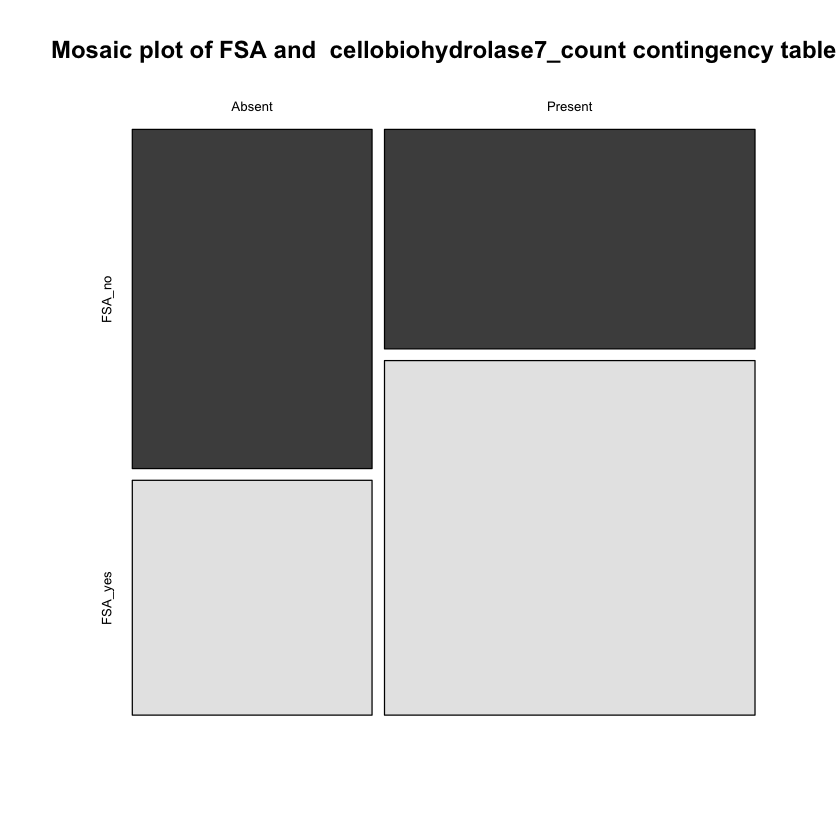

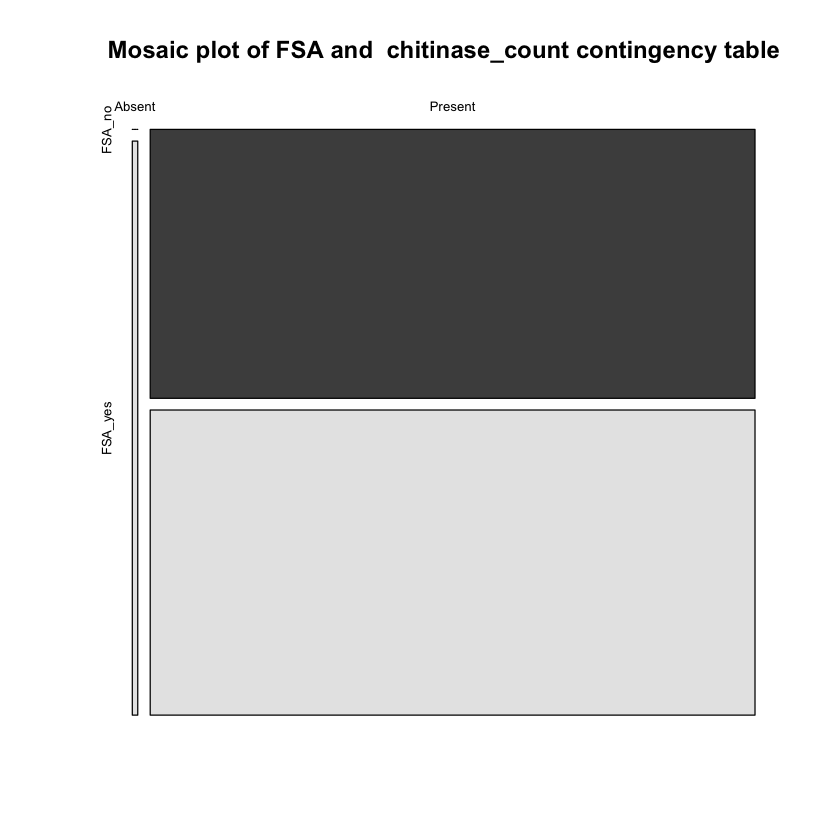

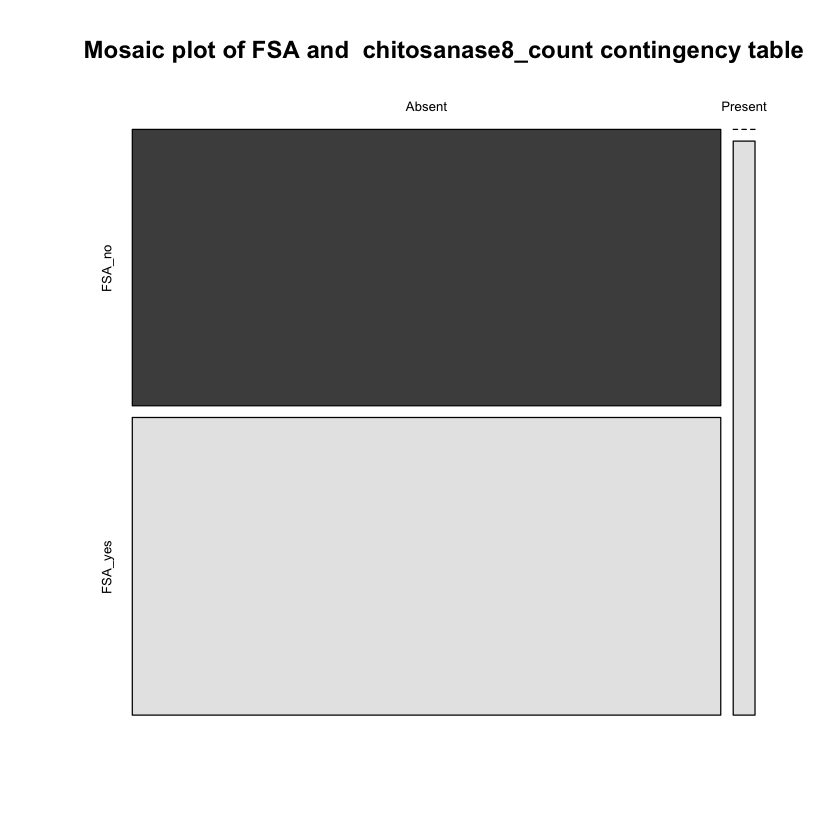

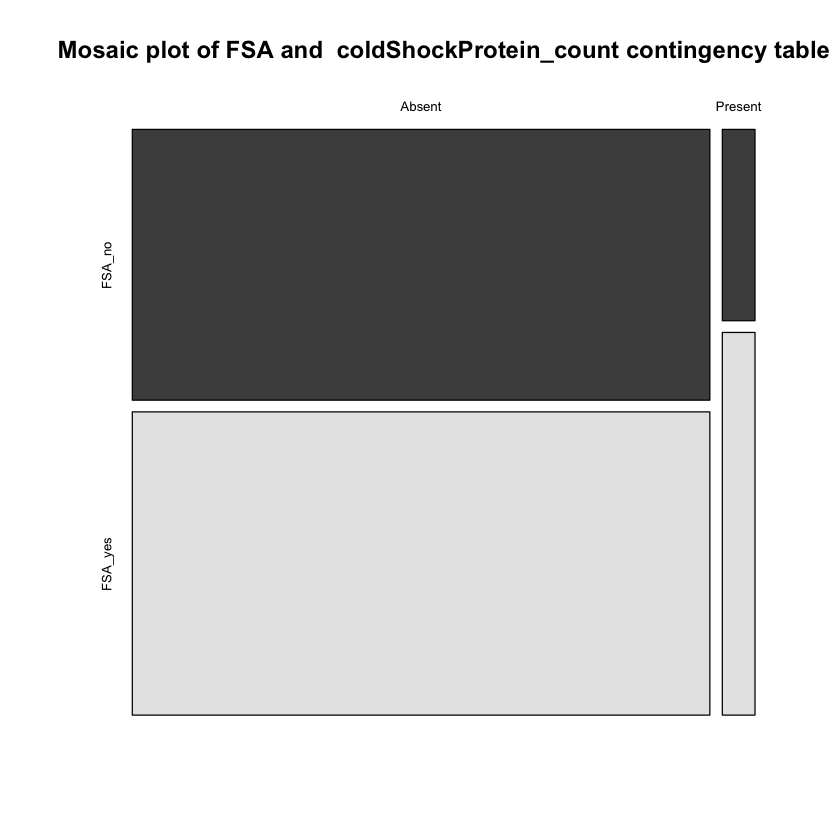

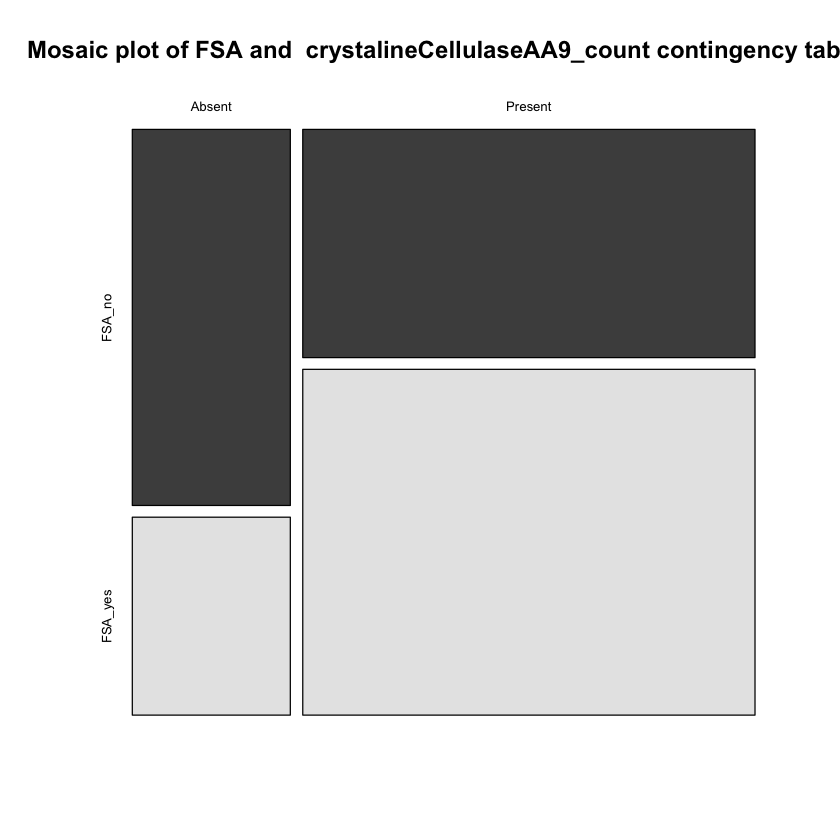

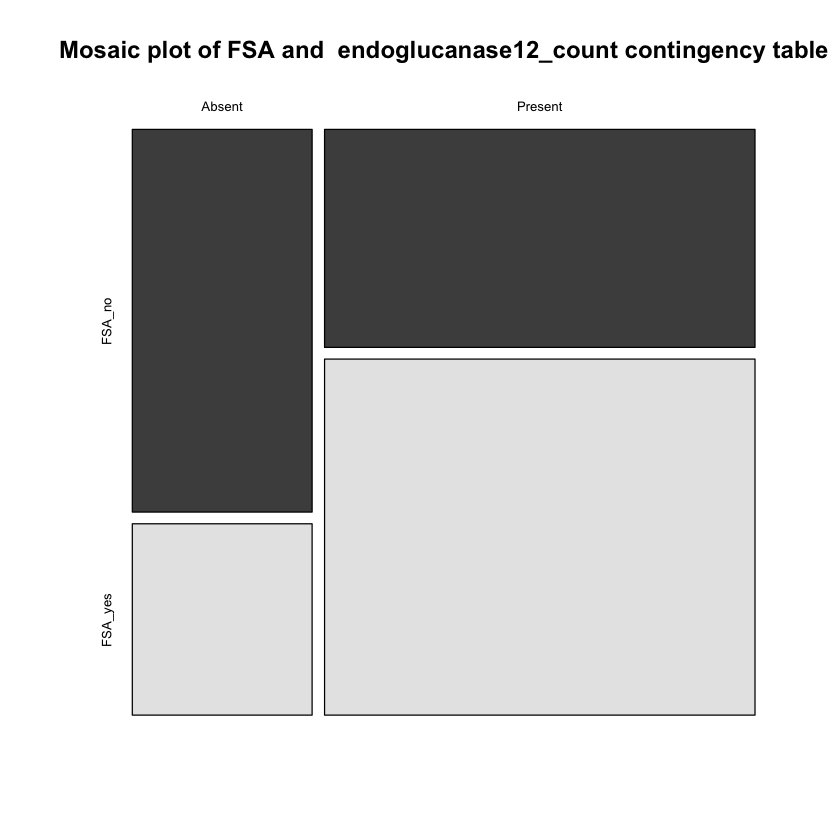

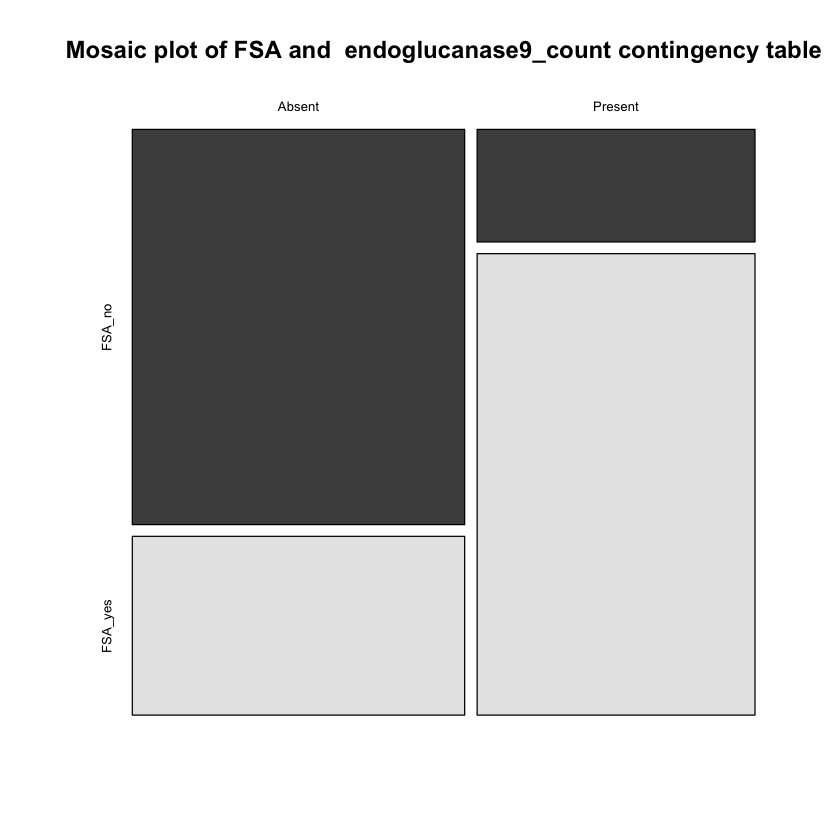

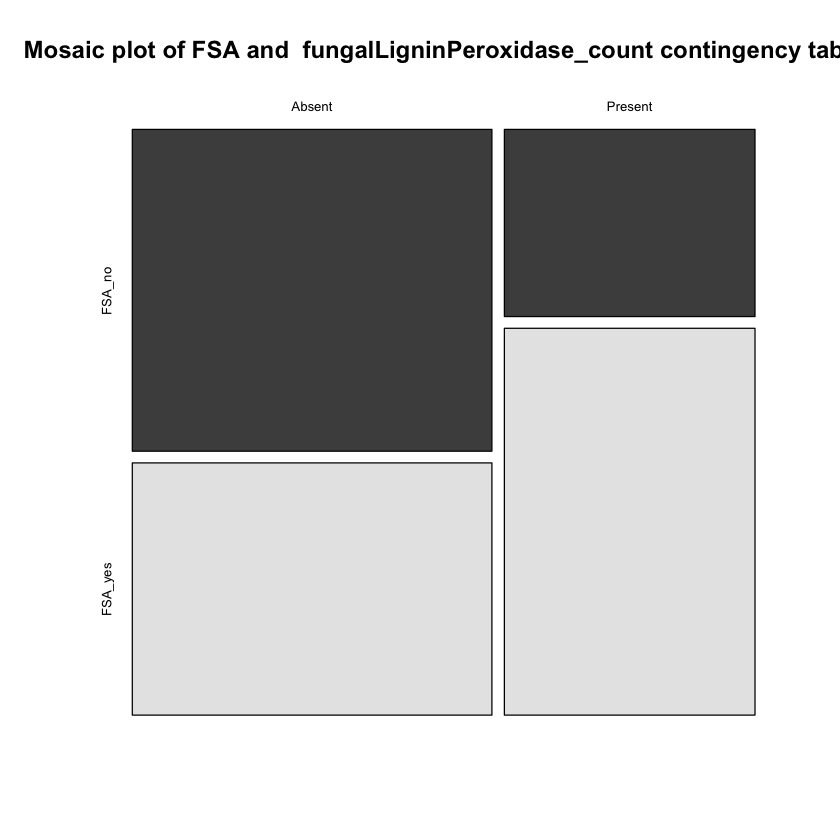

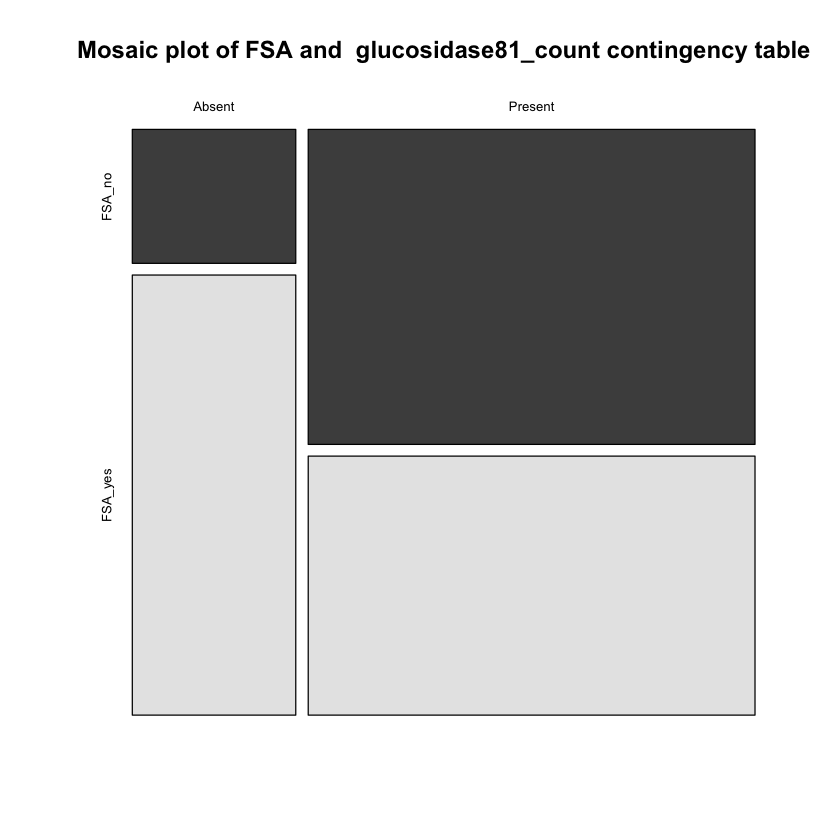

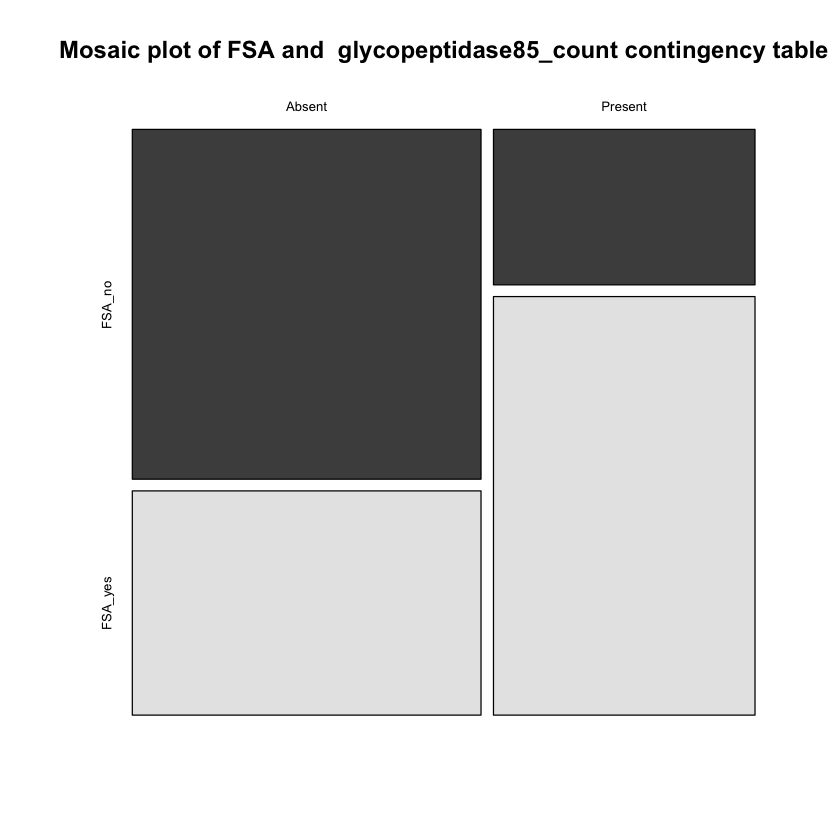

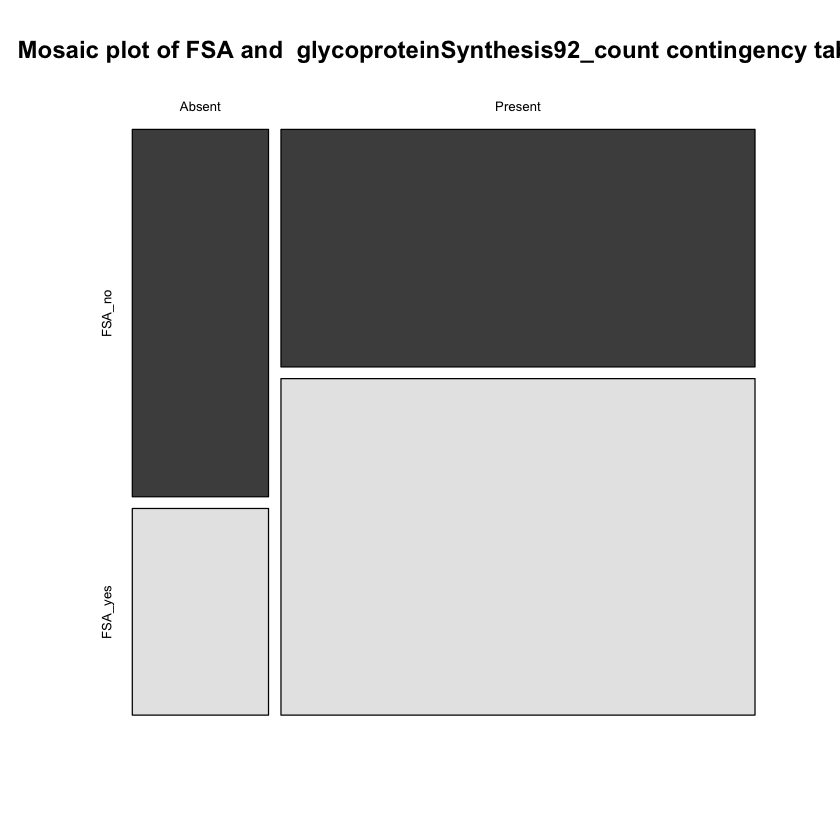

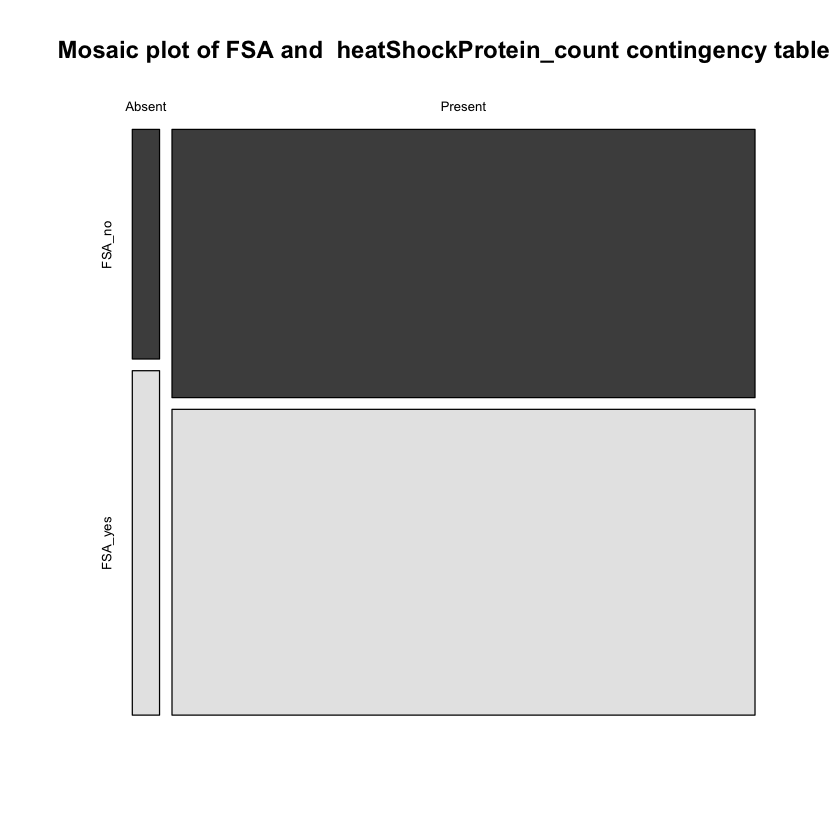

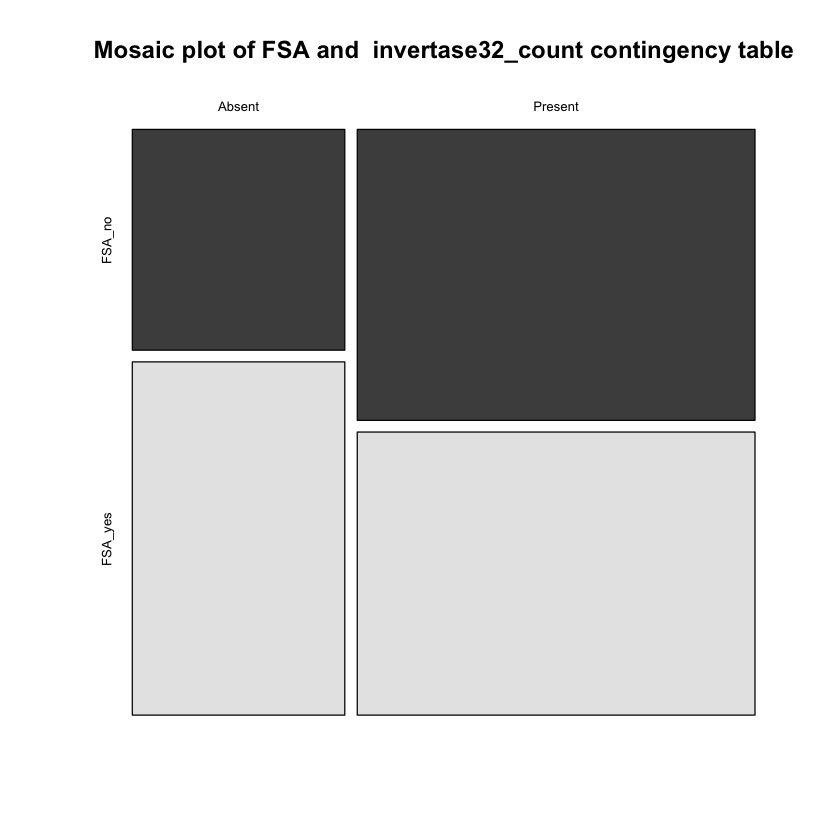

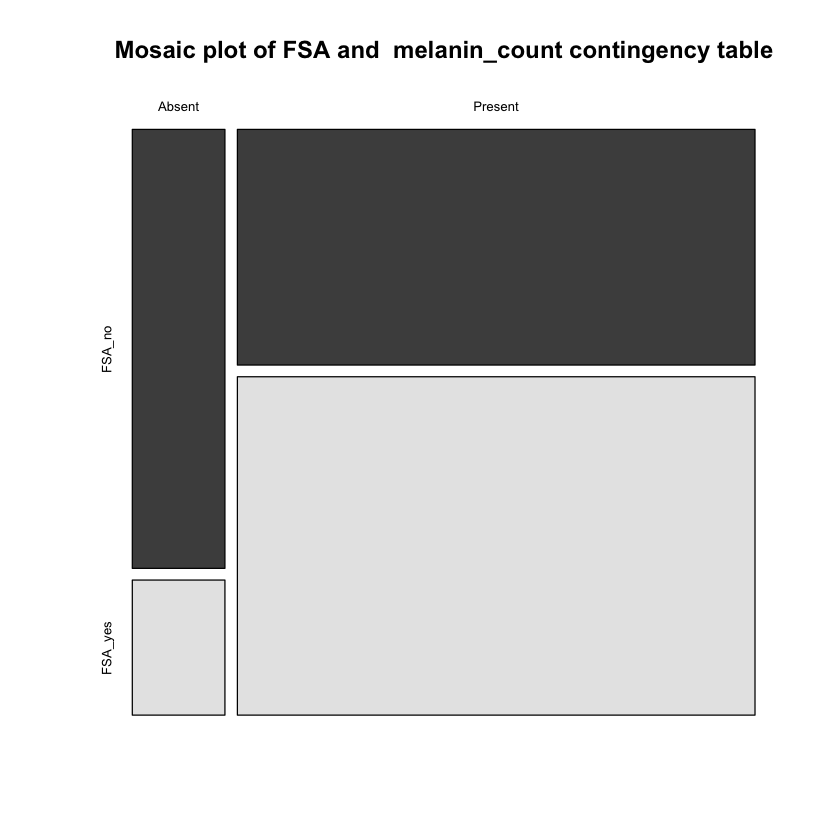

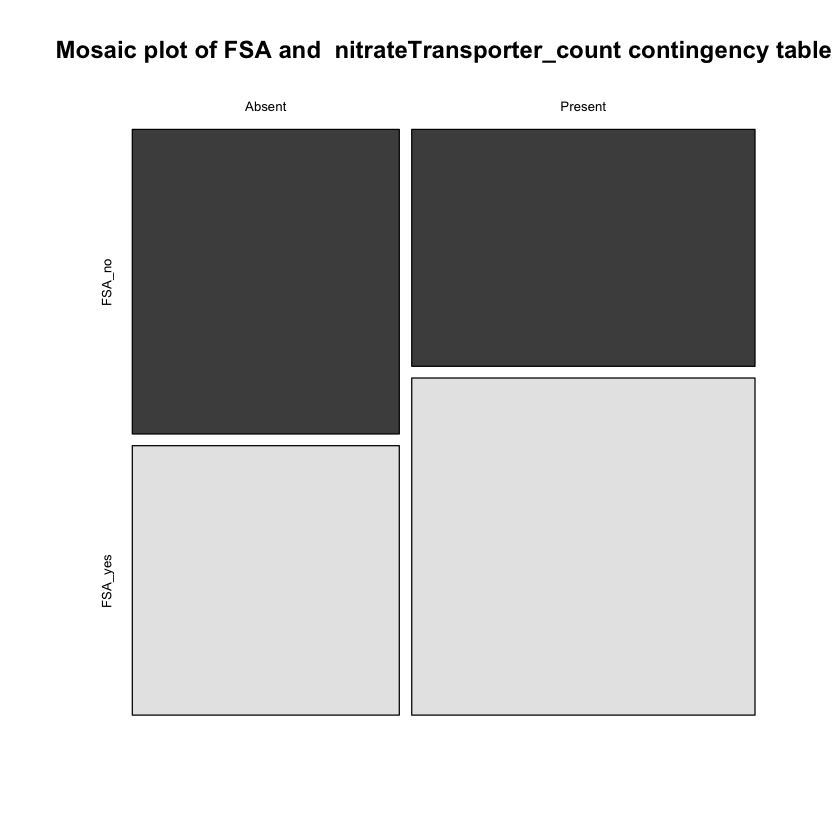

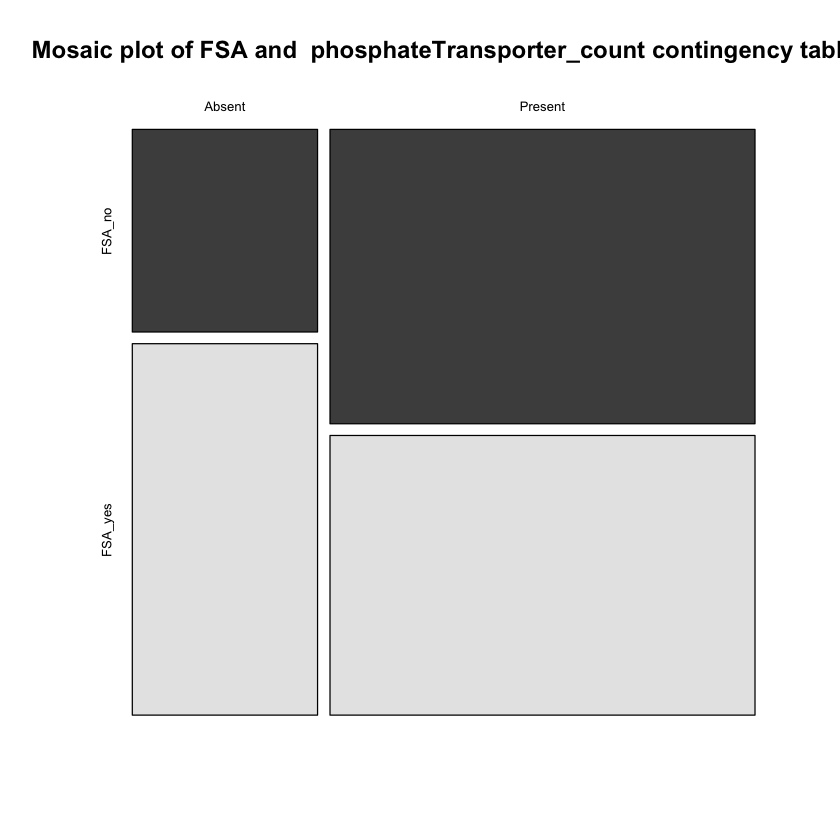

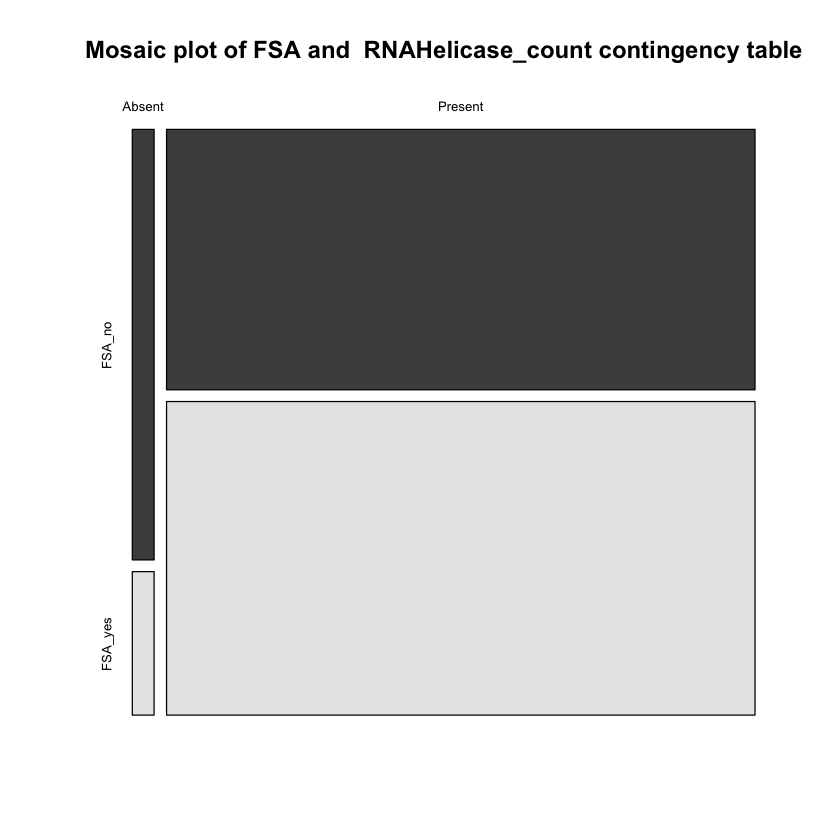

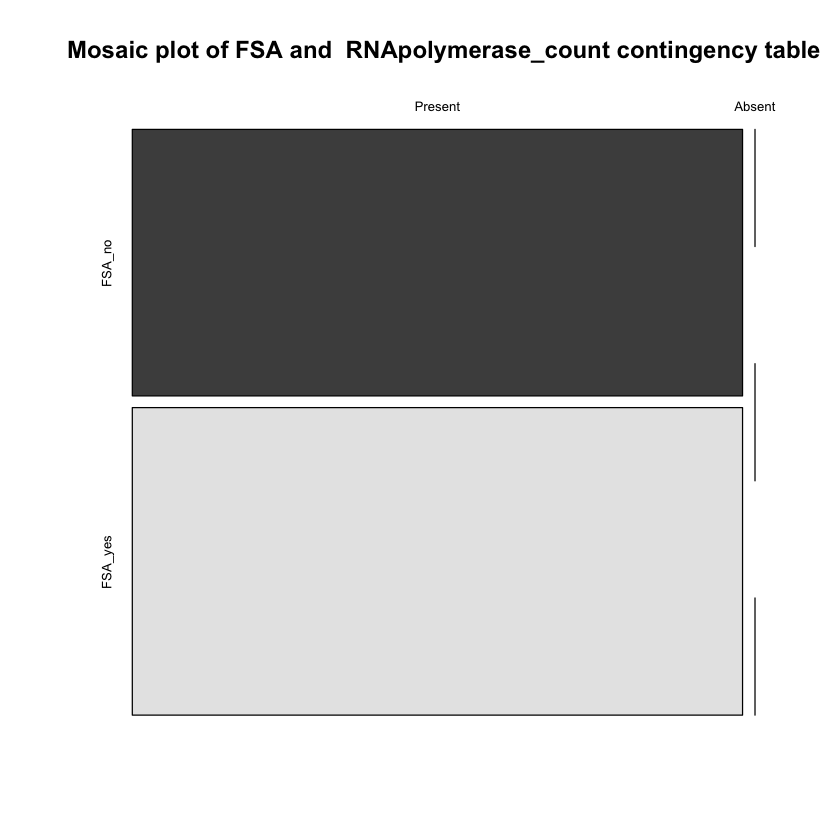

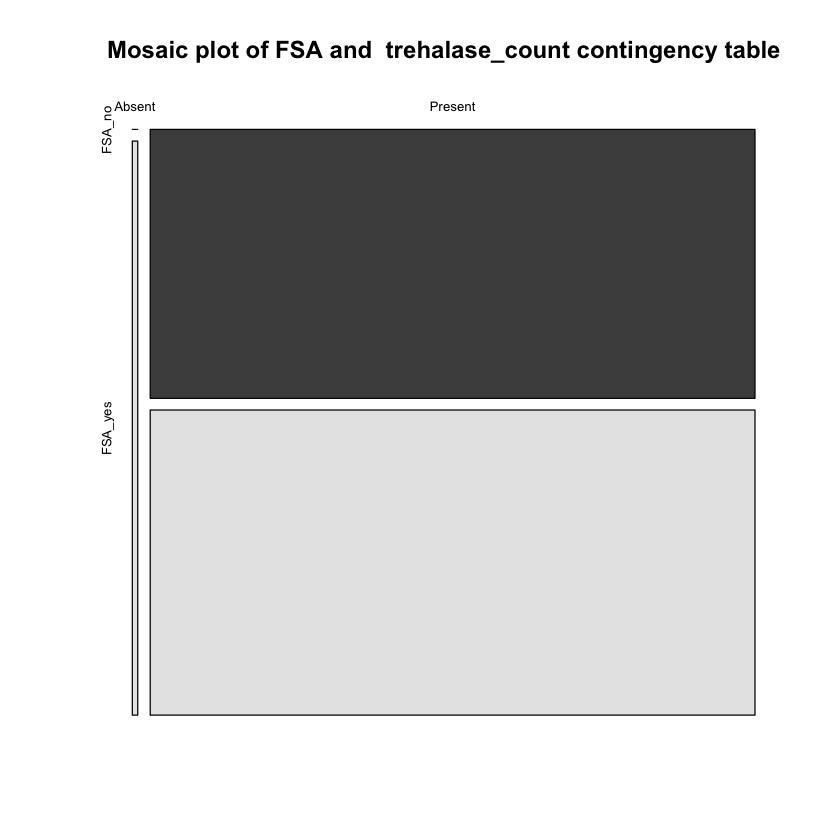

In [88]:
## 2 - Preparation of the contingency table
## We generate a contingency table for each gene and store them in a list

cont_table_list=list()


for (i in 1 :length(trait_gene)){
  dat=data_genes_simple[,c('tip.label','FSA',trait_gene[i])][,-1]
  rownames(dat)=data_genes_simple$tip.label
  
  cont_tab_i=cont_table_prep(dat)
  
  nb_lev=dim(cont_tab_i)[1]
  
  if (nb_lev==2){  # for some genes only one trait level is present (ex: 'Present' in all species), we have to add the information the other trait manually
    cont_table_list[[i]]=cont_tab_i
  } else {
    lev=rownames(cont_tab_i)
    cont_tab_b=cont_tab_i%>%add_row('FSA_no'=0,'FSA_yes'=0)
    
    if (lev=='Present'){
      rownames(cont_tab_b)=c('Present','Absent')
    } else {
      rownames(cont_tab_b)=c('Present','Absent')
    }
    
    cont_table_list[[i]]=cont_tab_b
    
  }

}

names(cont_table_list)=trait_gene




## 3 - Visualization of the contigency table as a mosaic plot
for (i in 1 : length(cont_table_list)){
  table=cont_table_list[[i]]
  gene=names(cont_table_list[i])
  
  mos_plot=mosaicplot(table, main=paste('Mosaic plot of FSA and ', gene, 'contingency table'),
                      color = TRUE)
}



In [90]:
## 4 - Expected frequency values calculation and test decision
## For each gene we determine what test between Chisquare or Fisher is more appropriate to run

table_test_choice=data.frame()

for (i in 1:length(cont_table_list)){
  table=cont_table_list[[i]]
  gene=names(cont_table_list[i])
  
  chi_test=chisq.test(table)
  chi_exp=chi_test$expected
  
  if (any(chi_exp<=5)==TRUE){
    dec='Fisher'
  } else {
    dec='Chisquare'
  }
  
  dat_temp=data.frame('Gene'=gene,'Test'=dec)
  table_test_choice=rbind(table_test_choice,dat_temp)
}

table_test_choice

Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(table):
“Chi-squared approximation may be incorrect”
Warn

Gene,Test
<chr>,<chr>
acidPhosphatase_count,Fisher
alphaGlucosidase15_count,Fisher
alphaGlucosidase31_count,Fisher
alphaManNAase76_count,Chisquare
aminoAcidPermease_count,Chisquare
ammoniumTransporter_count,Fisher
amylase88_count,Chisquare
auxinResponsivePromoter_count,Fisher
betaGlucanSynthase_count,Fisher


In [92]:
## 5 - Test
## We run the recommended test for each gene and store the pvalue in a data.frame (potentially can run adjustement for multiple comparison)
## No post-hoc will be necessary as only 2 groups per variables

test_results=data.frame()

for (i in 1:length(cont_table_list)){
  table=cont_table_list[[i]]
  gene=names(cont_table_list[i])
  dat_test=subset(table_test_choice, table_test_choice$Gene==gene)
  test_c=dat_test$Test
  
  if (test_c=='Fisher'){
    fish_t=fisher.test(table)
    pval_t=fish_t$p.value
  } else {
    chisq_t=chisq.test(table)
    pval_t=chisq_t$p.value
    
  }
  
  dat_tmp=data.frame('Gene'=gene,'Test'=test_c,'pvalue'=pval_t)
  test_results=rbind(test_results, dat_tmp)
}

adj_pvalue=p.adjust(test_results$pvalue,method='fdr')  # using fdr to correct for multiple comparison analysis
test_results$adj_pvalue=adj_pvalue

test_results



Gene,Test,pvalue,adj_pvalue
<chr>,<chr>,<dbl>,<dbl>
acidPhosphatase_count,Fisher,1.000000e+00,1.000000e+00
alphaGlucosidase15_count,Fisher,7.025294e-01,9.899277e-01
alphaGlucosidase31_count,Fisher,1.000000e+00,1.000000e+00
alphaManNAase76_count,Chisquare,3.204740e-02,9.031539e-02
aminoAcidPermease_count,Chisquare,3.038376e-03,1.883793e-02
ammoniumTransporter_count,Fisher,1.000000e+00,1.000000e+00
amylase88_count,Chisquare,1.710866e-03,1.325921e-02
auxinResponsivePromoter_count,Fisher,3.342878e-01,5.475602e-01
betaGlucanSynthase_count,Fisher,1.000000e+00,1.000000e+00


### <font color=gray> Conclusion FSA and genes presence/absence </font> 

We tested 31 genes as predictor of FSA status. After pvalue correction for multipel comparison analysis, we obtain **7 genes as potential predictors of FSA status** (relationship in parenthesis are infered fro mosaic plots):
- endoglucanase9 (absence of gene -> absence of FSA)
- glycopeptidase85 (absence of gene -> absence of FSA)
- amylase88 (absence of gene -> absence of FSA)
- beta-xylosidase43 (absence of gene -> absence of FSA)
- amino acid permease (absence of gene -> presence of FSA)
- glucosidase81 (absence of gene -> presence of FSA)
- endoglucanase12 (absence of gene -> absence of FSA)

Endoglucanses, amylase, xylosidase, glucosidase are involved in cellulose and starch metabolism, yet they may have different correlation relationship with FSA (glucosidase).
Glycopeptidase hydrolysis N-glycan groups from glycoproteins and glycopeptides
AA permease are membrane permeases for the transport of AA. 

While predicting FSA status from gene copy number versus presence/absence of the gene doesn't mean the same thing, some observations are consistent. 

It is unclear how the function of these genes could inform about a potential role of FSA



## <font color=#5088C5> Trophic mode analysis </font>

Trophic mode refers to how fungi obtain their nutrient. 3 main trophic modes have been identified:
- saprotroph: fungi obtain their nutrients from dead organic matter
- pathotroph: fungi obtain their nutrients through pathogenesis
- symbiotroph: fungi obtain their nutrients through symbiosis

We have trophic information for 106 species

**Hypothesis**:

We are testing if a species trophic mode and its FSA status are assocaited. Fungal species are capable to transition between different trophic modes. Because of this the same species will be included in two different trait levels, introducing paired data. Thus, to account for this, we encode each level as binary information and use linear mixed models to test for an effect of each level.


**Biological interpretation**

If presence/absence of FSA is correlated with a specific trophic mode, this could highlight a role of FSA in specific cell activity, transport assocaited with this specific trophic mode.



In [4]:
## 0 - Data reformating to simplified levels

data_troph=data_disc_traits[,c('tip.label','FSA','trophic_mode_fg')]%>%na.omit()

levels=c('Symbiotroph','Saprotroph','Pathotroph')

data_troph_simp=data.frame()

for(i in 1:length(levels)){
  lev=levels[i]
  dat_temp=data_troph[grep(lev,data_troph$trophic_mode_fg),]
  
  colnames(dat_temp)=c('species','FSA','troph_mode')
  dat_temp$troph_mode=lev
  
  data_troph_simp=rbind(data_troph_simp, dat_temp)
  
}


# Data transformation into binary information
data_troph_simp$bin=1
data_troph_bin=spread(data_troph_simp, troph_mode, bin) %>% replace(is.na(.), 0) 
data_troph_bin$FSA[data_troph_bin$FSA=="Yes"]=1  # replacing FSA status by binary information as well
data_troph_bin$FSA[data_troph_bin$FSA=="No"]=0 # replacing FSA status by binary information as well

rownames(data_troph_bin)=data_troph_bin$species  # formating data for glm input
data_troph_bin_t=data_troph_bin[,-1]
data_troph_bin_t$FSA=as.numeric(data_troph_bin_t$FSA)

data_troph_bin_t


,FSA,Pathotroph,Saprotroph,Symbiotroph
,<dbl>,<dbl>,<dbl>,<dbl>
Amanita_muscaria,1,0,0,1
Armillaria_gallica,1,1,1,0
Armillaria_mellea,1,1,1,0
Armillaria_ostoyae,1,1,1,0
Aspergillus_clavatus,1,1,0,0
Aspergillus_flavus,1,1,1,0
Aspergillus_fumigatus,1,1,1,0
Aspergillus_nidulans,1,0,1,0
Aspergillus_niger,1,1,1,0


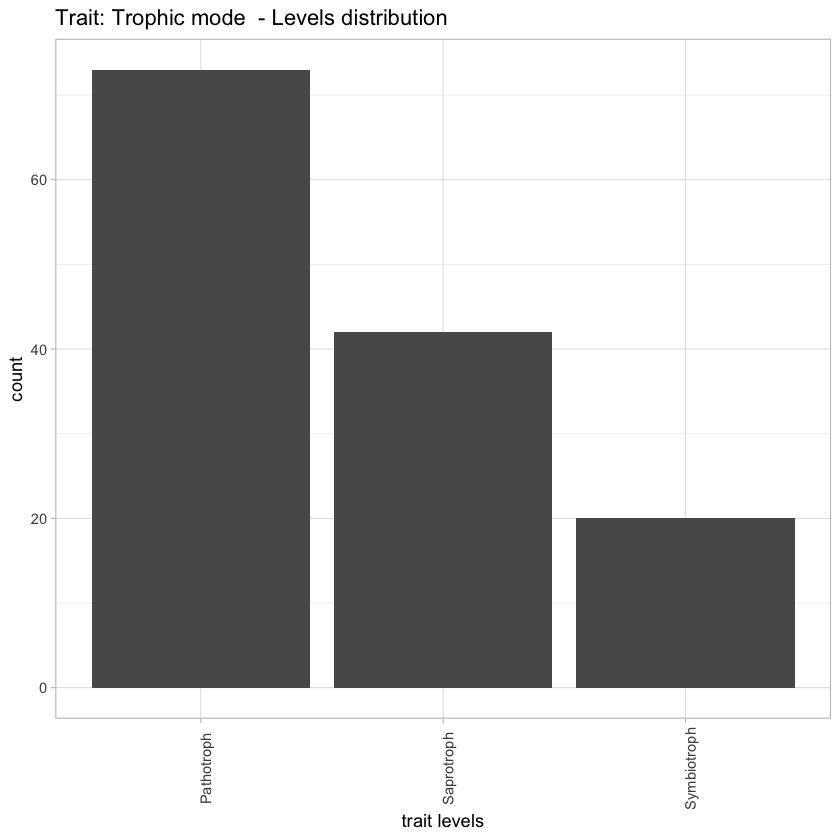

In [97]:
## 1- Data visualization

data_troph_viz=data_troph_simp
#rownames(data_troph_viz)=data_troph_viz$species
data_troph_viz=data_troph_viz[,-1]

plot_troph=trait_desc_p(data_troph_viz)
plot_troph + ggtitle ('Trait: Trophic mode  - Levels distribution') +
    theme(axis.text.x = element_text(angle=90))

,FSA_no,FSA_yes
,<int>,<int>
Pathotroph,38,35
Saprotroph,17,25
Symbiotroph,14,6


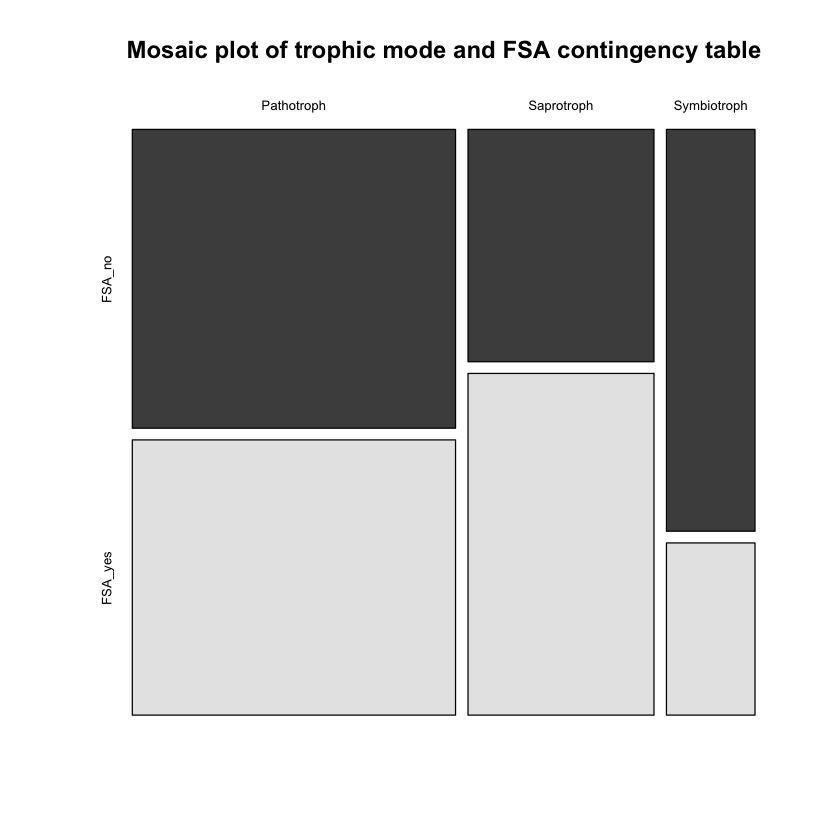

In [104]:
## 2- Contingency table

data_troph_cont=data_troph_simp[,-1]
cont_table_troph=data.frame(table(data_troph_cont))%>% spread(FSA,Freq)
colnames(cont_table_troph)=c('trait','FSA_no','FSA_yes')
rownames(cont_table_troph)=cont_table_troph$trait
cont_table_troph=cont_table_troph[,-1]


cont_table_troph

## 3 - Visualization of the contigency table as a mosaic plot
mos_plot=mosaicplot(cont_table_troph, main='Mosaic plot of trophic mode and FSA contingency table',
                    color = TRUE)


In [5]:
## 4 - Glm test

model_troph <- glm(FSA ~ Pathotroph + Saprotroph + Symbiotroph + Pathotroph:Saprotroph + Pathotroph:Symbiotroph + Saprotroph:Symbiotroph , 
             data = data_troph_bin_t, 
             family = binomial(link = "logit"))

summary(model_troph)



Call:
glm(formula = FSA ~ Pathotroph + Saprotroph + Symbiotroph + Pathotroph:Saprotroph + 
    Pathotroph:Symbiotroph + Saprotroph:Symbiotroph, family = binomial(link = "logit"), 
    data = data_troph_bin_t)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.482  -1.142   0.450   1.213   1.794  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)              15.9527  1455.3988   0.011    0.991
Pathotroph              -16.0361  1455.3988  -0.011    0.991
Saprotroph              -15.2595  1455.3987  -0.010    0.992
Symbiotroph             -16.5123  1455.3987  -0.011    0.991
Pathotroph:Saprotroph    15.6996  1455.3986   0.011    0.991
Pathotroph:Symbiotroph   15.2094  1455.3982   0.010    0.992
Saprotroph:Symbiotroph    0.2531     1.7539   0.144    0.885

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.95  on 105  degrees of freedom
Residual deviance: 139.47  on  99  degrees of freedom
AIC: 153.47

Num

### <font color=gray> Conclusion FSA and trophic mode </font> 

**FSA status and trophic mode are independent traits**

---

## <font color=#5088C5> FunGuild Guild analysis </font>

The FunGuild database classifies fungi into different ecological guilds (example: animal pathogen, wood saprotroph...). We have guild information for 106 species. In this data set there are 14 different individual levels, and as for trophic mode one species can have a combination of multiple guild levels. 
Trying to simplify the individual levels into broader category, we actually end up with the same categorization as the trophic mode: pathogen, symbionts, saprotroph. Indeed, guild information levels could easily be described a more granular trophic information (ex: wood saprotroph, leaf-saprotroph etc...).
Thus, with this information we can actually study each trophic mode in more detail to see if there is any specific sub levels that is assocaited with FSA presence or absence 

We are then investing the following traits independently:
- Saprotroph: ( 6 levels: Litter Saprotroph , Leaf Saprotroph, Wood Saprotroph, Undefined Saprotroph, Dung Saprotroph, Soil Saprotroph)
- Symbiont: ( 5 levels: Ectomycorrhizal, Endophyte, Arbuscular Mycorrhizal, Animal Endosymbiont, Epiphyte)
- Pathogen (3 levels: Plant Pathogen, Animal Pathogen, Fungal Parasite)



In [108]:
## - 0 Data preparation and formating
data_guild=data_disc_traits[,c('tip.label','FSA','guild_fg')]%>%na.omit()

  ## Analysis within guild
# Levels for saprotroph
lev_sap=c("Litter Saprotroph" , "Leaf Saprotroph","Wood Saprotroph", "Undefined Saprotroph","Dung Saprotroph","Soil Saprotroph" )

# Levels for symbiont
lev_sym=c("Ectomycorrhizal","Endophyte","Arbuscular Mycorrhizal","Animal Endosymbiont","Epiphyte")

# Levels for pathogen
lev_pat=c("Plant Pathogen","Animal Pathogen","Fungal Parasite")


#### Saprotrophy analysis

,FSA_no,FSA_yes
,<int>,<int>
Dung Saprotroph,2,1
Leaf Saprotroph,0,2
Litter Saprotroph,0,1
Soil Saprotroph,0,1
Undefined Saprotroph,11,11
Wood Saprotroph,5,11


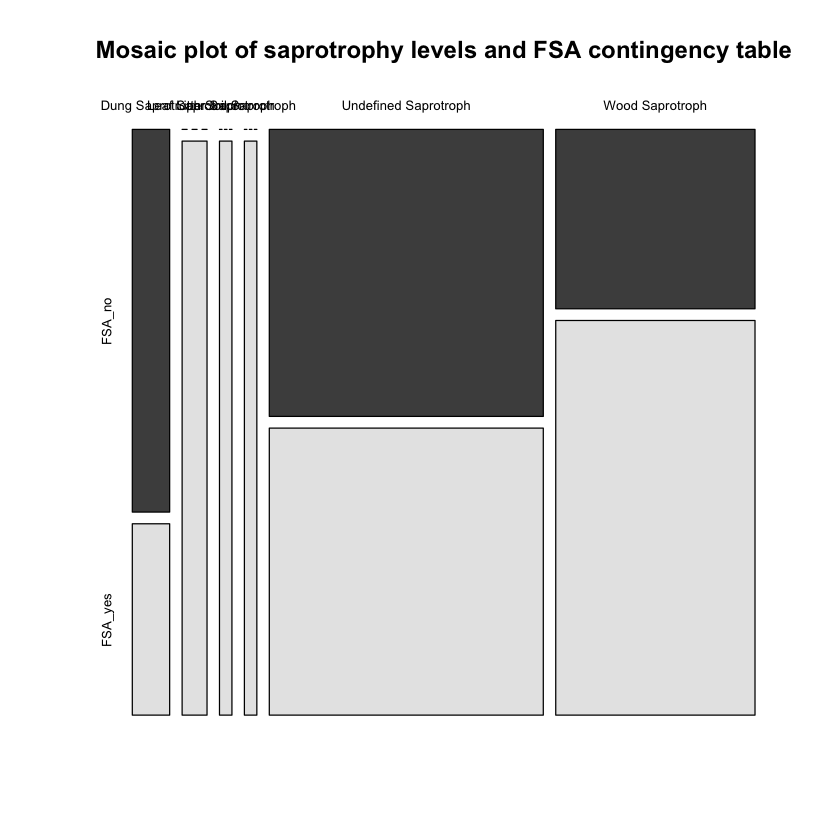

In [111]:

# Data formating
data_sap=data.frame()

for(i in 1:length(lev_sap)){
  lev=lev_sap[i]
  dat_temp=data_guild[grep(lev,data_guild$guild_fg),]
  
  colnames(dat_temp)=c('species','FSA','sap_mode')
  dat_temp$sap_mode=lev
  
  data_sap=rbind(data_sap, dat_temp)
  
}

#Contingency table prep
data_sap_cont=data_sap[,-1]
cont_table_sap=data.frame(table(data_sap_cont))%>% spread(FSA,Freq)
colnames(cont_table_sap)=c('trait','FSA_no','FSA_yes')

row.names(cont_table_sap)=cont_table_sap$trait
cont_table_sap=cont_table_sap[,-1]

cont_table_sap


mos_plot=mosaicplot(cont_table_sap, main='Mosaic plot of saprotrophy levels and FSA contingency table',
                    color = TRUE)

In [112]:
# 4 - Decision on test to run
chi_sap_test=chisq.test(cont_table_sap)
chi_sap_test$expected


Warning message in chisq.test(cont_table_sap):
“Chi-squared approximation may be incorrect”


,FSA_no,FSA_yes
Dung Saprotroph,1.2,1.8
Leaf Saprotroph,0.8,1.2
Litter Saprotroph,0.4,0.6
Soil Saprotroph,0.4,0.6
Undefined Saprotroph,8.8,13.2
Wood Saprotroph,6.4,9.6


In [113]:
# 5 - Fisher test
## The contingency table has one or multiple cell that are less than 5 so we do a Fisher test

fish_sap_test=fisher.test(cont_table_sap)
fish_pval=fish_sap_test$p.value

fish_pval

[1] 0.5066297

**As expected based on the contingency table there is no correlation between saprotrophic mode and FSA status**

#### Symbiont analysis

,FSA_no,FSA_yes
,<int>,<int>
Animal Endosymbiont,1,0
Arbuscular Mycorrhizal,0,1
Ectomycorrhizal,1,1
Endophyte,12,7
Epiphyte,0,1


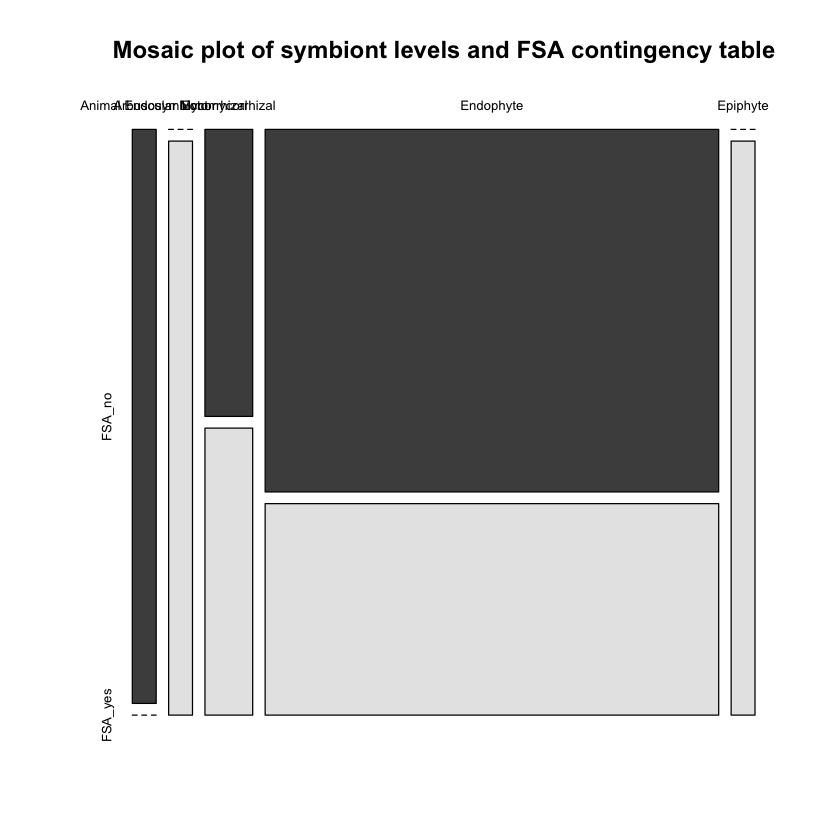

In [114]:
# Data formating
data_symb=data.frame()

for(i in 1:length(lev_sym)){
  lev=lev_sym[i]
  dat_temp=data_guild[grep(lev,data_guild$guild_fg),]
  
  colnames(dat_temp)=c('species','FSA','sym_mode')
  dat_temp$sym_mode=lev
  
  data_symb=rbind(data_symb, dat_temp)
  
}

#Contingency table prep
data_symb_cont=data_symb[,-1]
cont_table_symb=data.frame(table(data_symb_cont))%>% spread(FSA,Freq)
colnames(cont_table_symb)=c('trait','FSA_no','FSA_yes')

row.names(cont_table_symb)=cont_table_symb$trait
cont_table_symb=cont_table_symb[,-1]

cont_table_symb


mos_plot=mosaicplot(cont_table_symb, main='Mosaic plot of symbiont levels and FSA contingency table',
                    color = TRUE)

**Looking at the contingency table and plot, it is quite clear that there is no connection between symbiont status and FSA status.**


#### Pathogen analysis

,FSA_no,FSA_yes
,<int>,<int>
Animal Pathogen,14,14
Fungal Parasite,2,2
Plant Pathogen,24,20


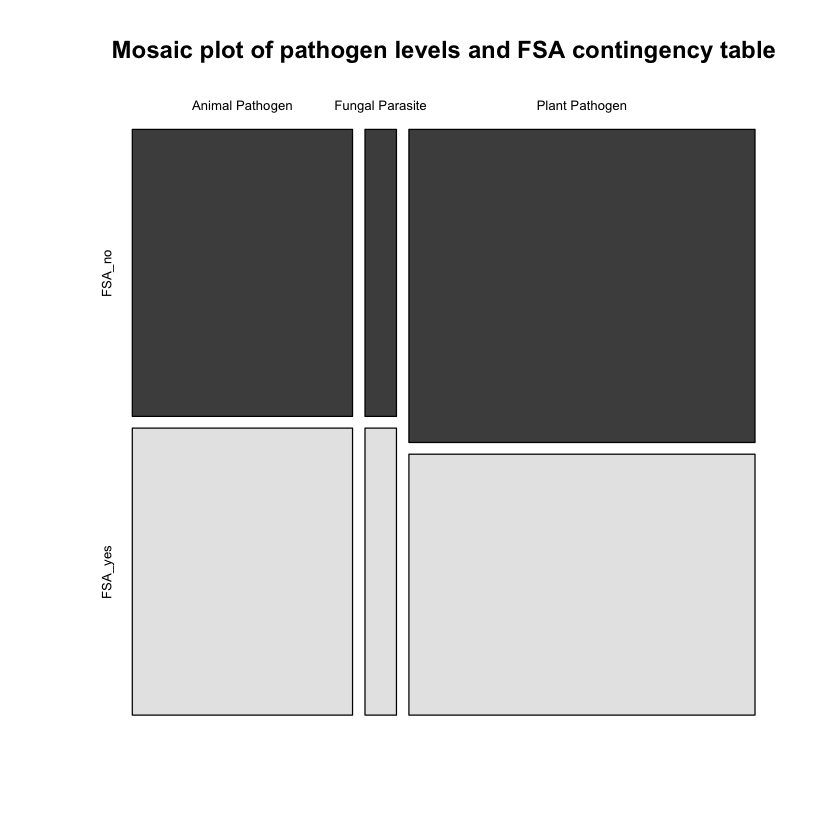

In [116]:
# Data formating
data_pat=data.frame()

for(i in 1:length(lev_pat)){
  lev=lev_pat[i]
  dat_temp=data_guild[grep(lev,data_guild$guild_fg),]
  
  colnames(dat_temp)=c('species','FSA','pat_mode')
  dat_temp$pat_mode=lev
  
  data_pat=rbind(data_pat, dat_temp)
  
}

#Contingency table prep
data_pat_cont=data_pat[,-1]
cont_table_pat=data.frame(table(data_pat_cont))%>% spread(FSA,Freq)
colnames(cont_table_pat)=c('trait','FSA_no','FSA_yes')

rownames(cont_table_pat)=cont_table_pat$trait
cont_table_pat=cont_table_pat[,-1]

cont_table_pat


mos_plot=mosaicplot(cont_table_pat, main='Mosaic plot of pathogen levels and FSA contingency table',
                    color = TRUE)


In [117]:
# 4- Test decision
chi_pat_test=chisq.test(cont_table_pat)
chi_pat_test$expected



Warning message in chisq.test(cont_table_pat):
“Chi-squared approximation may be incorrect”


,FSA_no,FSA_yes
Animal Pathogen,14.736842,13.263158
Fungal Parasite,2.105263,1.894737
Plant Pathogen,23.157895,20.842105


In [118]:
# 5 fisher test

fish_pat_test=fisher.test(cont_table_pat)
fish_pval=fish_pat_test$p.value
fish_pval

[1] 0.9272173

**As expected considering the contingency table, there is no connection between the pathogen types and FSA status**